In [85]:
import pandas as pd

# Read directly from a public S3 Parquet file (no auth needed)
df = pd.read_parquet("s3://ursa-labs-taxi-data/2018/01/data.parquet", engine="pyarrow")
df.head()

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 8759874 rows and 17 columns.


In [4]:
from IPython.display import display

display(df)

vendor_id           pickup_at          dropoff_at  passenger_count  \
0               1 2018-01-01 00:21:05 2018-01-01 00:24:23                1   
1               1 2018-01-01 00:44:55 2018-01-01 01:03:05                1   
2               1 2018-01-01 00:08:26 2018-01-01 00:14:21                2   
3               1 2018-01-01 00:20:22 2018-01-01 00:52:51                1   
4               1 2018-01-01 00:09:18 2018-01-01 00:27:06                2   
...           ...                 ...                 ...              ...   
8759869         1 2018-01-31 23:21:35 2018-01-31 23:34:20                2   
8759870         1 2018-01-31 23:35:51 2018-01-31 23:38:57                1   
8759871         2 2018-01-31 23:28:00 2018-01-31 23:37:09                1   
8759872         2 2018-01-31 23:24:40 2018-01-31 23:25:28                1   
8759873         2 2018-01-31 23:28:16 2018-01-31 23:28:38                1   

         trip_distance rate_code_id store_and_fwd_flag  pickup_location_id  \
0                 0.50            1                  N                  41   
1                 2.70            1                  N                 239   
2                 0.80            1                  N                 262   
3                10.20            1                  N                 140   
4                 2.50            1                  N                 246   
...                ...          ...                ...                 ...   
8759869           2.80            1                  N                 158   
8759870           0.60            1                  N                 163   
8759871           2.95            1                  N                  74   
8759872           0.00            1                  N                   7   
8759873           0.00            1                  N                   7   

         dropoff_location_id payment_type  fare_amount  extra  mta_tax  \
0                         24            2          4.5    0.5      0.5   
1                        140            2         14.0    0.5      0.5   
2                        141            1          6.0    0.5      0.5   
3                        257            2         33.5    0.5      0.5   
4                        239            1         12.5    0.5      0.5   
...                      ...          ...          ...    ...      ...   
8759869                  163            1         12.0    0.5      0.5   
8759870                  162            1          4.5    0.5      0.5   
8759871                   69            2         10.5    0.5      0.5   
8759872                  193            2          0.0    0.0      0.0   
8759873                  193            2          0.0    0.0      0.0   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  
0              0.00           0.0                    0.3      5.800000  
1              0.00           0.0                    0.3     15.300000  
2              1.00           0.0                    0.3      8.300000  
3              0.00           0.0                    0.3     34.799999  
4              2.75           0.0                    0.3     16.549999  
...             ...           ...                    ...           ...  
8759869        2.65           0.0                    0.3     15.950000  
8759870        1.15           0.0                    0.3      6.950000  
8759871        0.00           0.0                    0.3     11.800000  
8759872        0.00           0.0                    0.0      0.000000  
8759873        0.00           0.0                    0.0      0.000000  

[8759874 rows x 17 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Data Preparation

Convert timestamp columns to datetime objects and extract time-based features.

In [5]:
# Convert timestamp columns to datetime objects
df['pickup_at'] = pd.to_datetime(df['pickup_at'])
df['dropoff_at'] = pd.to_datetime(df['dropoff_at'])

In [6]:
# Extract hour of the day for pickup
df['pickup_hour'] = df['pickup_at'].dt.hour

In [7]:
# Extract day of the week for pickup
df['pickup_dayofweek'] = df['pickup_at'].dt.dayofweek

In [8]:
# Map day of the week to names for better readability
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_dayofweek_name'] = df['pickup_dayofweek'].map(day_names)

## Trip Duration Analysis

Calculate and analyze the distribution of trip durations.

In [9]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['dropoff_at'] - df['pickup_at']).dt.total_seconds() / 60

In [10]:
# Display descriptive statistics for trip duration
display(df['trip_duration'].describe())

count    8.759874e+06
mean     1.566172e+01
std      6.033998e+01
min     -5.711583e+03
25%      6.233333e+00
50%      1.036667e+01
75%      1.683333e+01
max      5.382067e+03
Name: trip_duration, dtype: float64

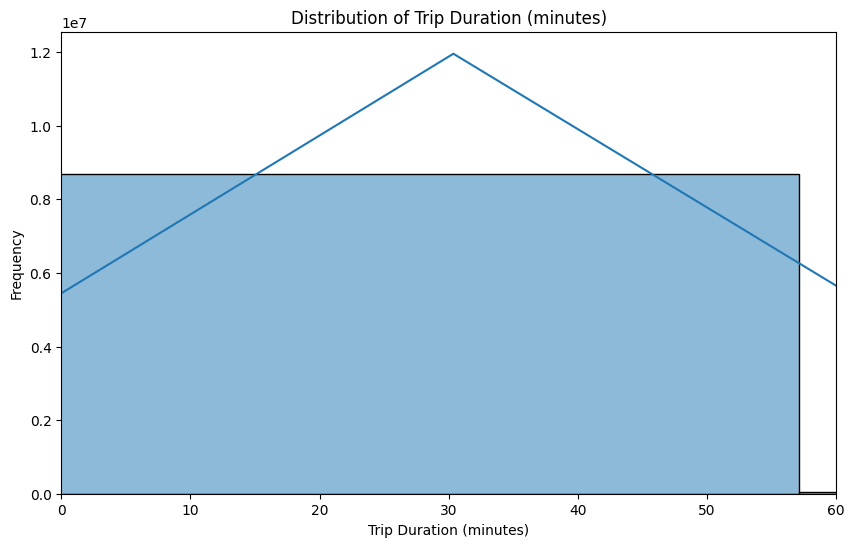

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of trip duration
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title('Distribution of Trip Duration (minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 60) # Limit x-axis for better visualization of typical trips
plt.show()

## Passenger Count Analysis

Analyze the distribution of passenger counts.

In [12]:
# Display value counts for passenger count
display(df['passenger_count'].value_counts())

passenger_count
1    6248817
2    1271615
5     414473
3     351927
6     250115
4     163571
0      59269
7         38
9         25
8         24
Name: count, dtype: int64

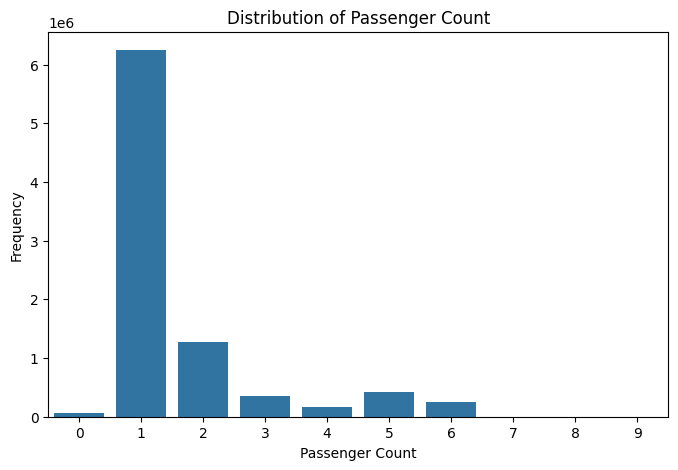

In [13]:
# Visualize the distribution of passenger count
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='passenger_count')
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

## Trip Distance Analysis

Analyze the distribution of trip distances.

In [14]:
# Display descriptive statistics for trip distance
display(df['trip_distance'].describe())

count    8.759874e+06
mean     2.804003e+00
std      6.411599e+01
min      0.000000e+00
25%      9.100000e-01
50%      1.550000e+00
75%      2.840000e+00
max      1.894838e+05
Name: trip_distance, dtype: float64

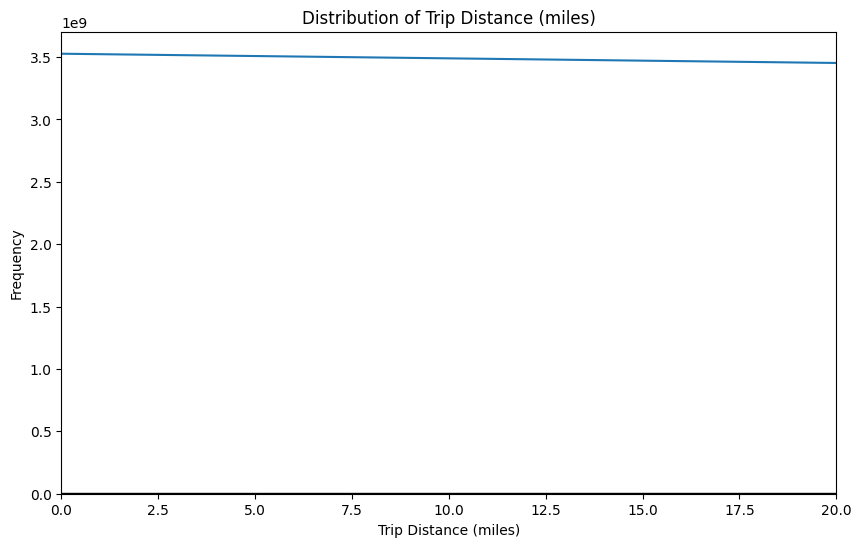

In [15]:
# Visualize the distribution of trip distance
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distance (miles)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(0, 20) # Limit x-axis for better visualization of typical trips
plt.show()

## Visualize Trip Data by Time and Day

Analyze trip patterns based on time of day and day of the week.

In [16]:
# Average trip duration by hour of the day
avg_duration_hour = df.groupby('pickup_hour')['trip_duration'].mean().reset_index()

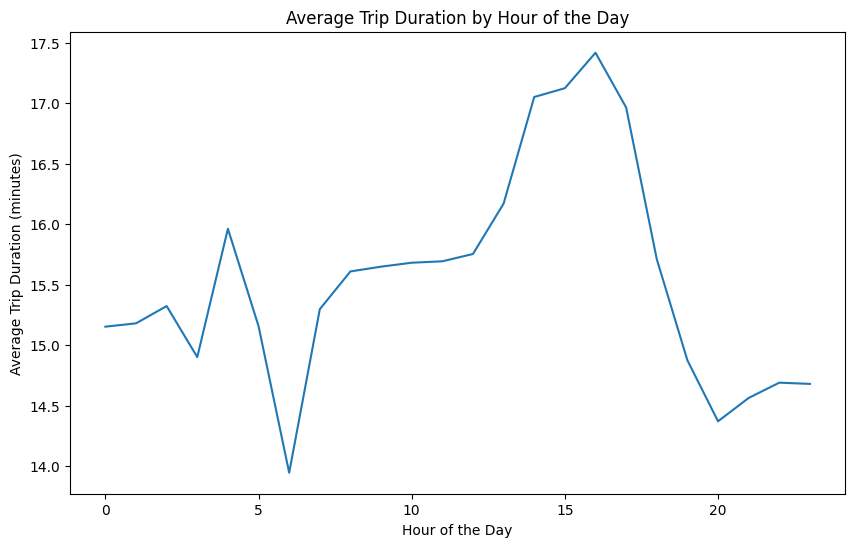

In [17]:
# Visualize average trip duration by hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_duration_hour, x='pickup_hour', y='trip_duration')
plt.title('Average Trip Duration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()

In [18]:
# Average trip distance by hour of the day
avg_distance_hour = df.groupby('pickup_hour')['trip_distance'].mean().reset_index()

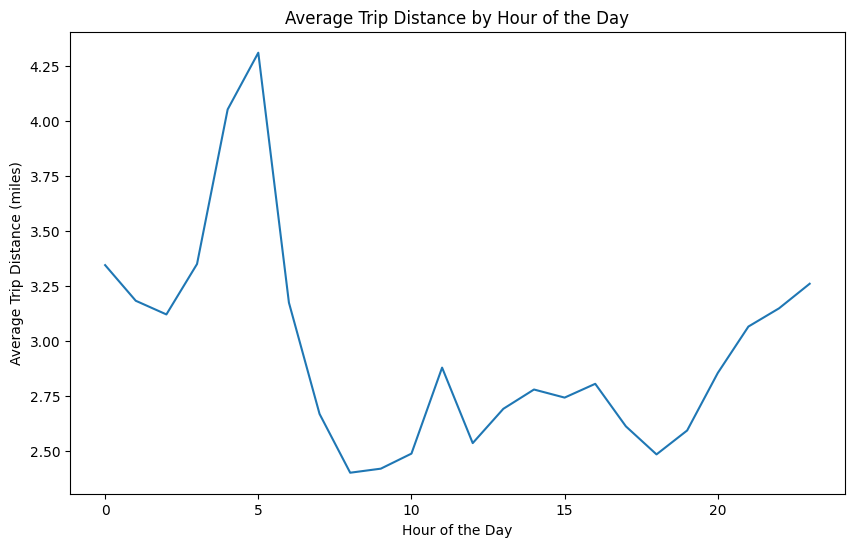

In [19]:
# Visualize average trip distance by hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_distance_hour, x='pickup_hour', y='trip_distance')
plt.title('Average Trip Distance by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance (miles)')
plt.show()

In [20]:
# Number of trips by hour of the day
trips_by_hour = df['pickup_hour'].value_counts().sort_index().reset_index()
trips_by_hour.columns = ['hour', 'trip_count']

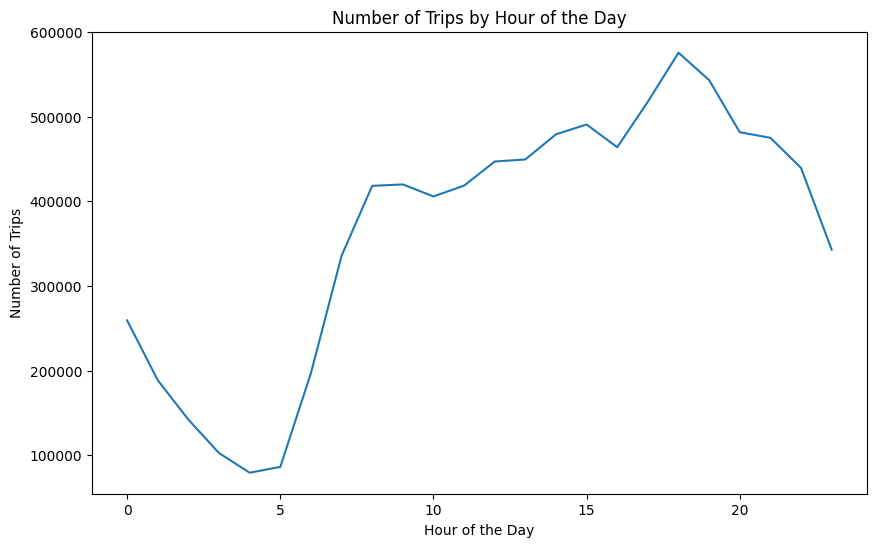

In [21]:
# Visualize number of trips by hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=trips_by_hour, x='hour', y='trip_count')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

## Analyze Payment Types

Analyze the distribution of different payment types.

In [28]:
# Display value counts for payment type
display(df['payment_type'].value_counts())

payment_type
1    6105871
2    2598947
3      43204
4      11852
Name: count, dtype: int64

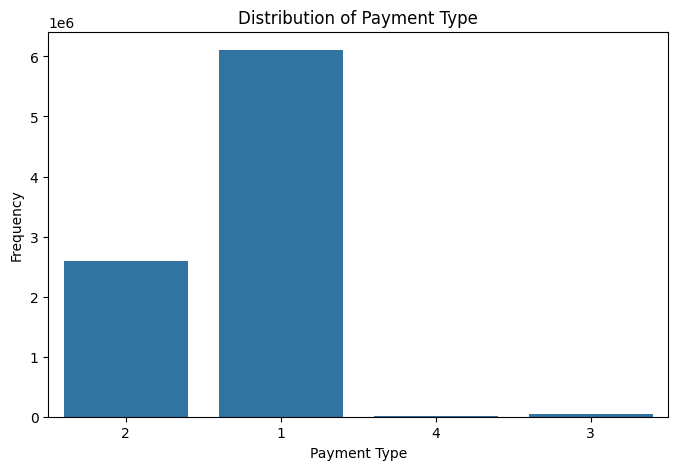

In [29]:
# Visualize the distribution of payment type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='payment_type')
plt.title('Distribution of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.show()

## Analyze Fare Amount

Analyze the distribution of fare amounts and their relationship with trip distance.

In [30]:
# Display descriptive statistics for fare amount
display(df['fare_amount'].describe())

count    8.759874e+06
mean     1.224435e+01
std      1.156352e+01
min     -4.500000e+02
25%      6.000000e+00
50%      9.000000e+00
75%      1.350000e+01
max      8.016000e+03
Name: fare_amount, dtype: float64

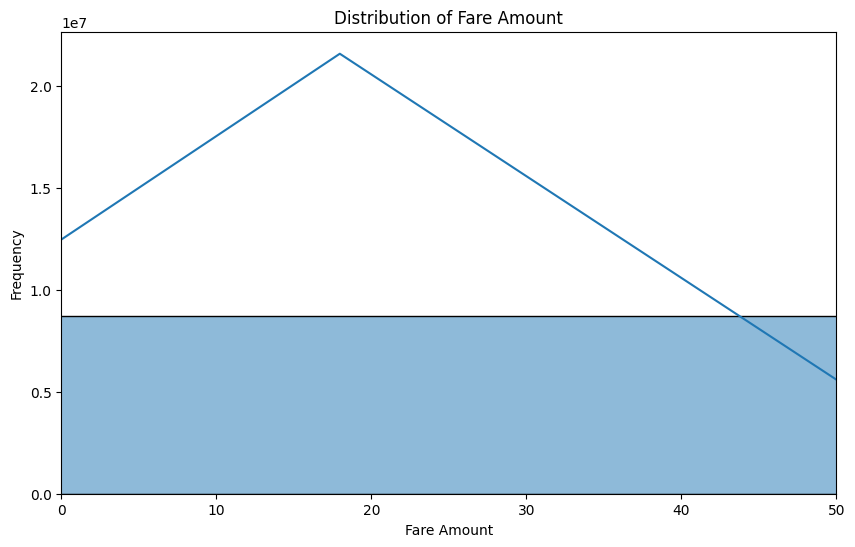

In [31]:
# Visualize the distribution of fare amount
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.xlim(0, 50) # Limit x-axis for better visualization of typical fares
plt.show()

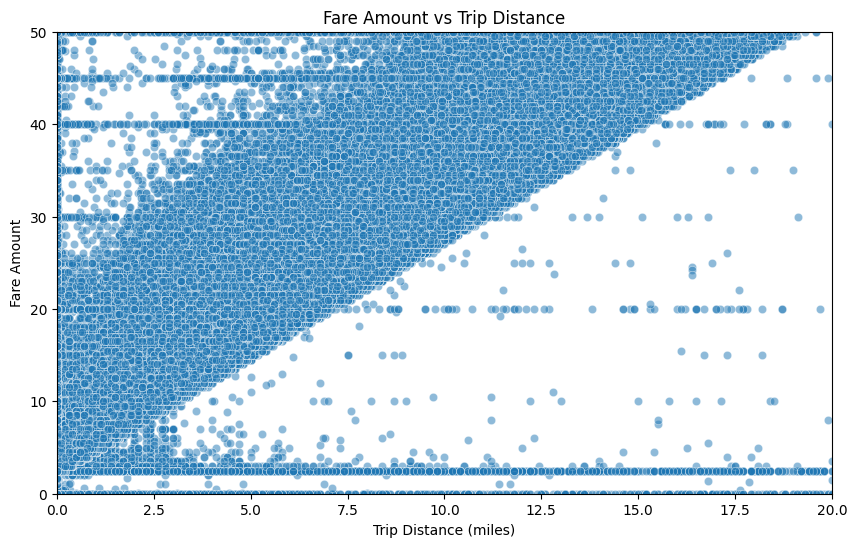

In [32]:
# Scatter plot of fare amount vs trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.xlim(0, 20) # Limit x-axis
plt.ylim(0, 50) # Limit y-axis
plt.show()

## Analyze Tip Amount

Analyze the distribution of tip amounts and their relationship with fare amount.

In [33]:
# Display descriptive statistics for tip amount
display(df['tip_amount'].describe())

count    8.759874e+06
mean     1.818745e+00
std      2.493073e+00
min     -8.880000e+01
25%      0.000000e+00
50%      1.360000e+00
75%      2.350000e+00
max      4.417100e+02
Name: tip_amount, dtype: float64

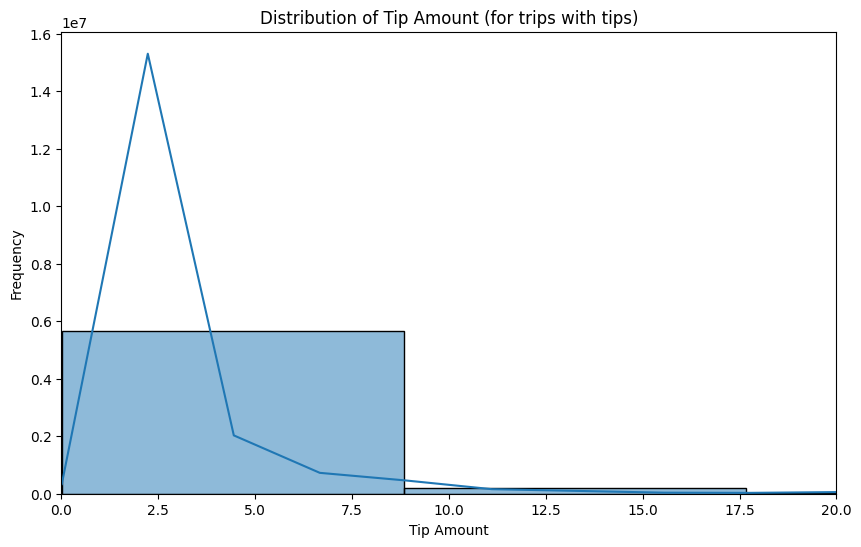

In [34]:
# Visualize the distribution of tip amount
plt.figure(figsize=(10, 6))
sns.histplot(df[df['tip_amount'] > 0]['tip_amount'], bins=50, kde=True) # Consider only trips with tips
plt.title('Distribution of Tip Amount (for trips with tips)')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.xlim(0, 20) # Limit x-axis
plt.show()

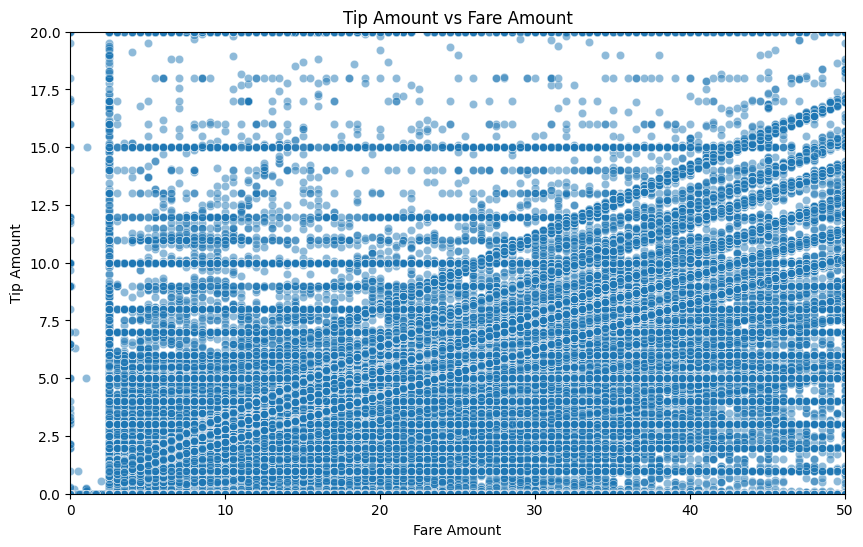

In [35]:
# Scatter plot of tip amount vs fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fare_amount', y='tip_amount', alpha=0.5)
plt.title('Tip Amount vs Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.xlim(0, 50) # Limit x-axis
plt.ylim(0, 20) # Limit y-axis
plt.show()

## Analyze Vendor Performance

Compare trip metrics between different vendors.

In [36]:
# Average trip duration by vendor
avg_duration_vendor = df.groupby('vendor_id')['trip_duration'].mean().reset_index()

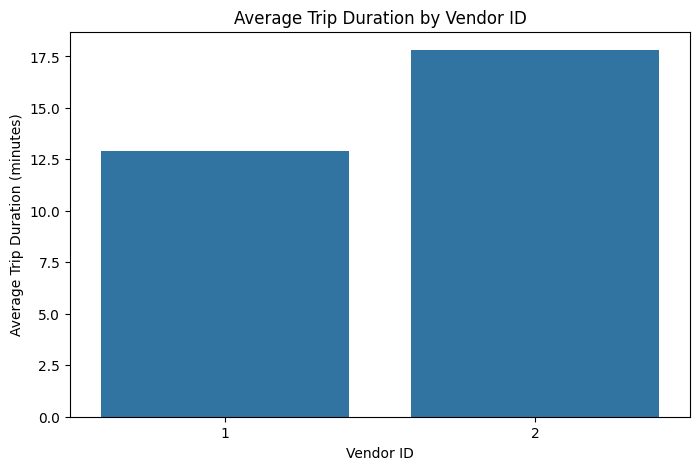

In [37]:
# Visualize average trip duration by vendor
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_duration_vendor, x='vendor_id', y='trip_duration')
plt.title('Average Trip Duration by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()

In [38]:
# Average trip distance by vendor
avg_distance_vendor = df.groupby('vendor_id')['trip_distance'].mean().reset_index()

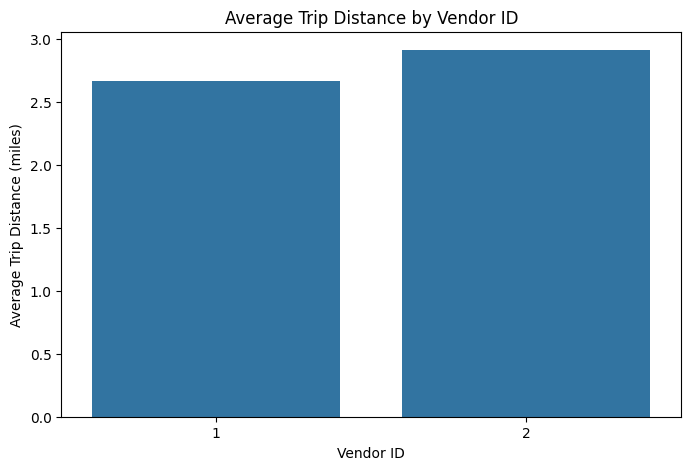

In [39]:
# Visualize average trip distance by vendor
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_distance_vendor, x='vendor_id', y='trip_distance')
plt.title('Average Trip Distance by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Distance (miles)')
plt.show()

In [40]:
# Average fare amount by vendor
avg_fare_vendor = df.groupby('vendor_id')['fare_amount'].mean().reset_index()

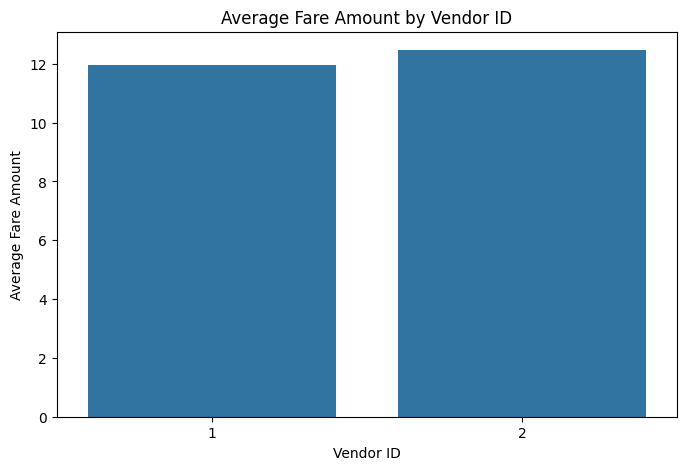

In [41]:
# Visualize average fare amount by vendor
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_fare_vendor, x='vendor_id', y='fare_amount')
plt.title('Average Fare Amount by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare Amount')
plt.show()

In [42]:
# Average tip amount by vendor
avg_tip_vendor = df.groupby('vendor_id')['tip_amount'].mean().reset_index()

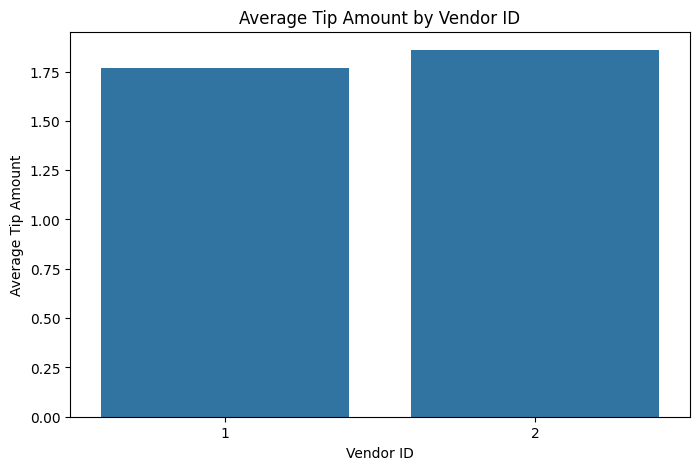

In [43]:
# Visualize average tip amount by vendor
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_tip_vendor, x='vendor_id', y='tip_amount')
plt.title('Average Tip Amount by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Average Tip Amount')
plt.show()

## Further Analysis and Visualizations

Let's create some more specific visualizations and analyses to reach the desired number of cells.

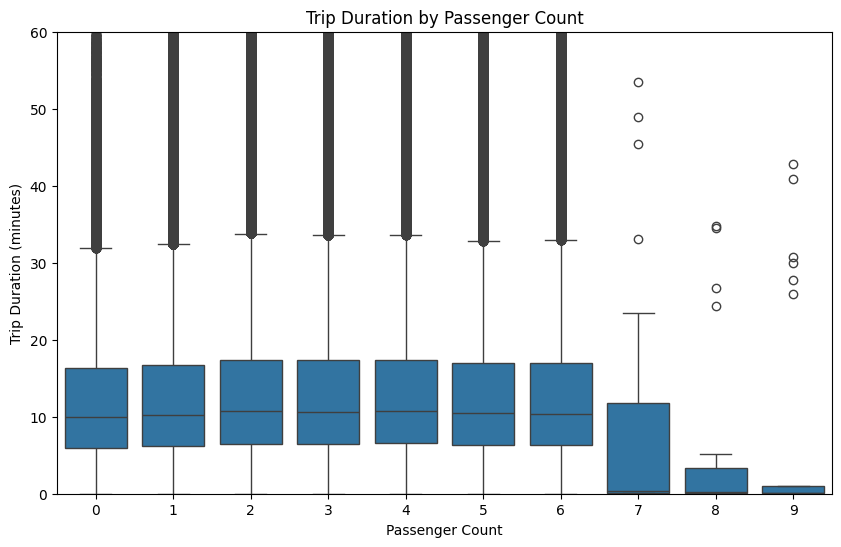

In [44]:
# Relationship between trip duration and passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='trip_duration')
plt.title('Trip Duration by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration (minutes)')
plt.ylim(0, 60)
plt.show()

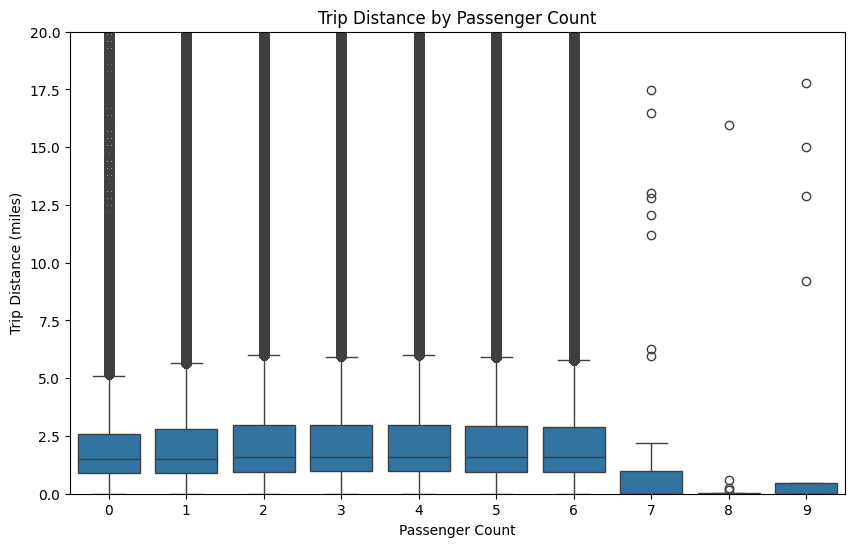

In [45]:
# Relationship between trip distance and passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='trip_distance')
plt.title('Trip Distance by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Distance (miles)')
plt.ylim(0, 20)
plt.show()

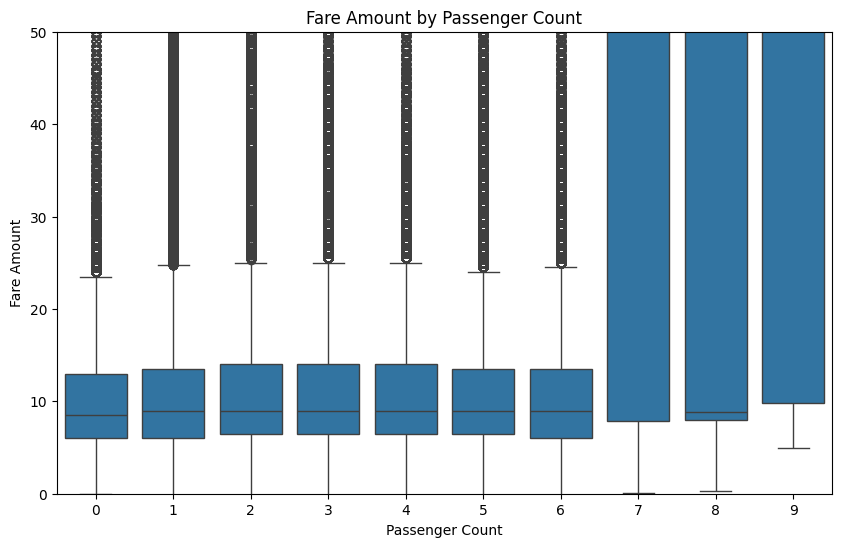

In [46]:
# Relationship between fare amount and passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount')
plt.title('Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.ylim(0, 50)
plt.show()

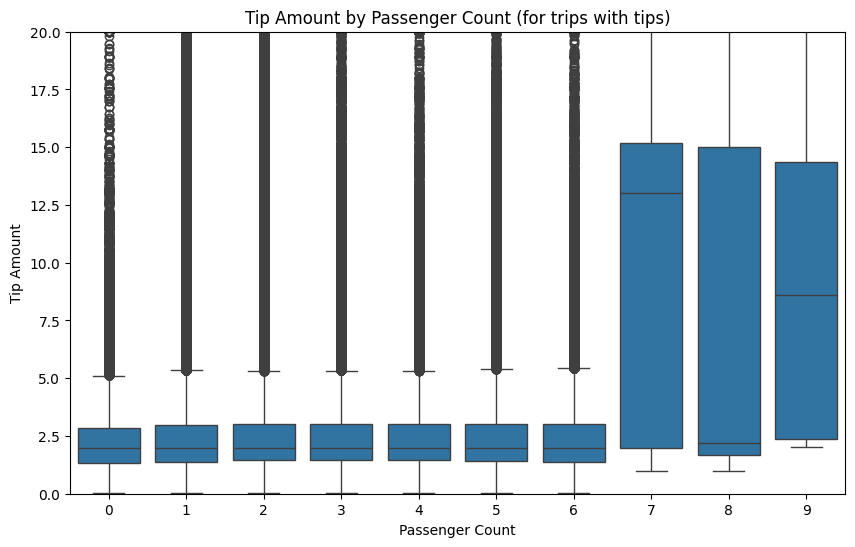

In [47]:
# Relationship between tip amount and passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['tip_amount'] > 0], x='passenger_count', y='tip_amount')
plt.title('Tip Amount by Passenger Count (for trips with tips)')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Amount')
plt.ylim(0, 20)
plt.show()

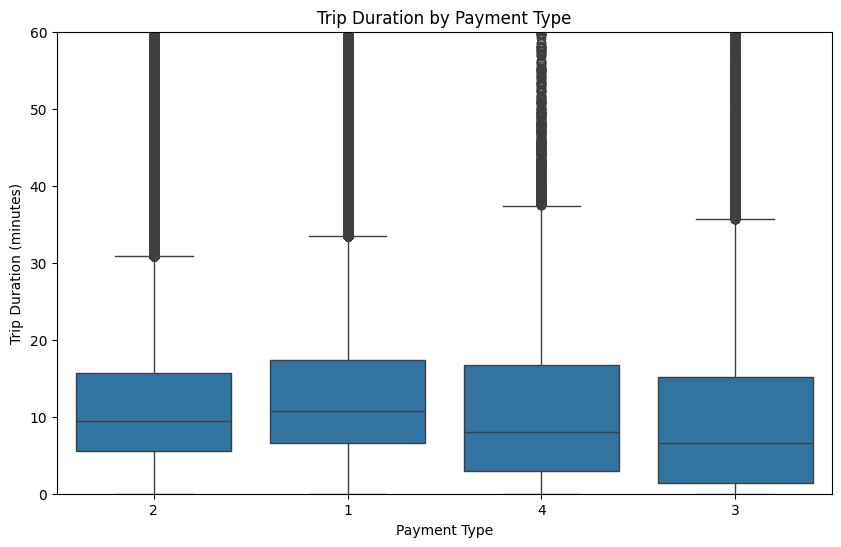

In [58]:
# Relationship between trip duration and payment type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='payment_type', y='trip_duration')
plt.title('Trip Duration by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Trip Duration (minutes)')
plt.ylim(0, 60)
plt.show()

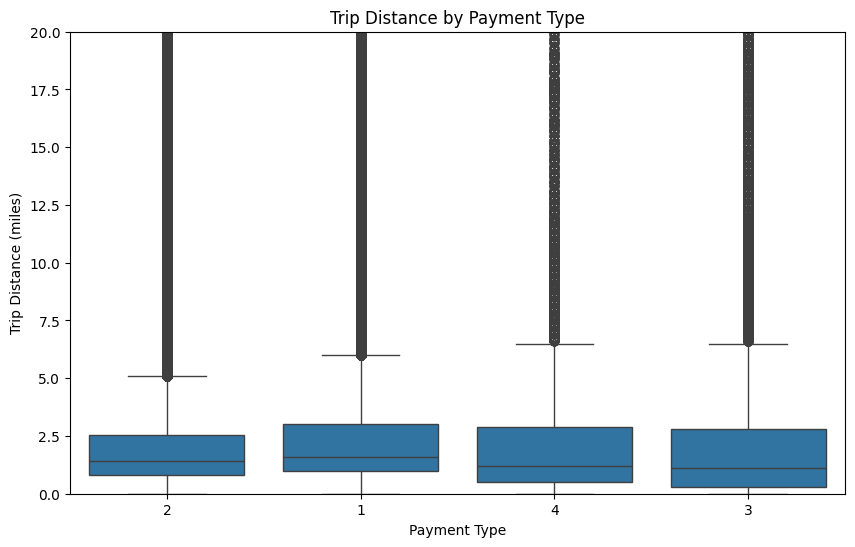

In [59]:
# Relationship between trip distance and payment type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='payment_type', y='trip_distance')
plt.title('Trip Distance by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Trip Distance (miles)')
plt.ylim(0, 20)
plt.show()

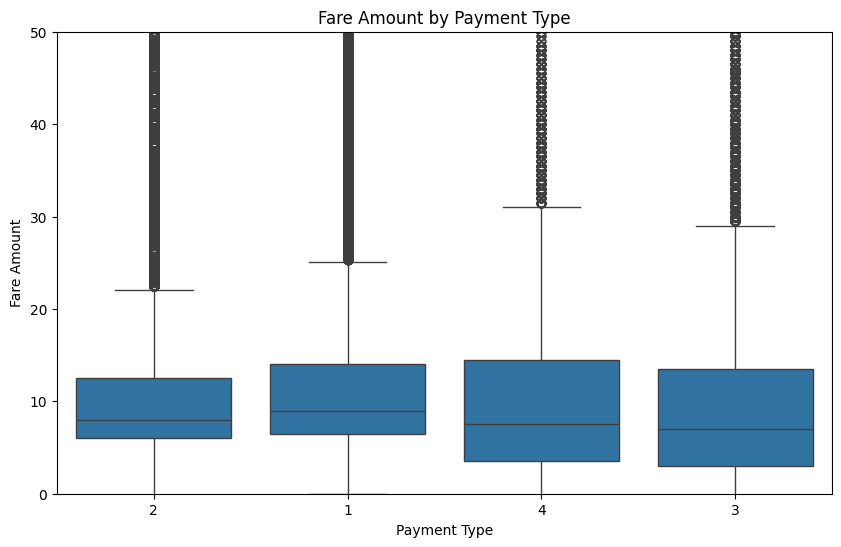

In [60]:
# Relationship between fare amount and payment type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='payment_type', y='fare_amount')
plt.title('Fare Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.ylim(0, 50)
plt.show()

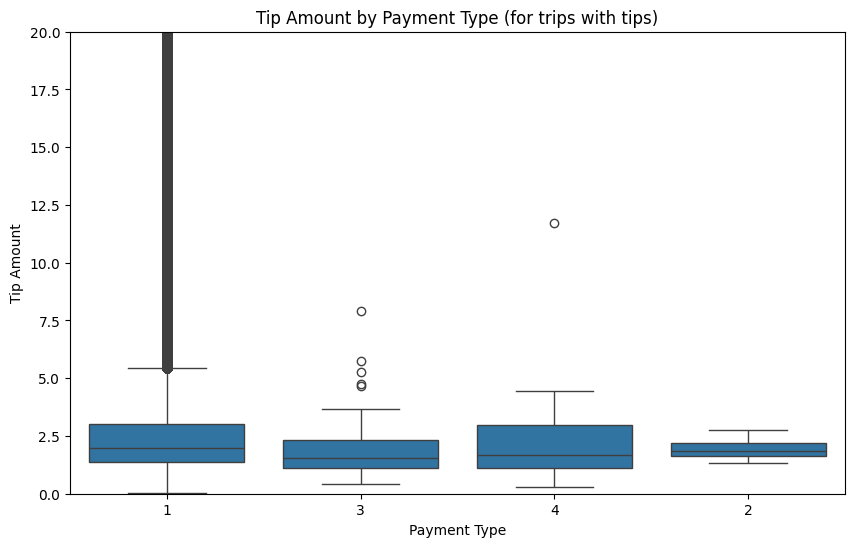

In [61]:
# Relationship between tip amount and payment type (for trips with tips)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['tip_amount'] > 0], x='payment_type', y='tip_amount')
plt.title('Tip Amount by Payment Type (for trips with tips)')
plt.xlabel('Payment Type')
plt.ylabel('Tip Amount')
plt.ylim(0, 20)
plt.show()

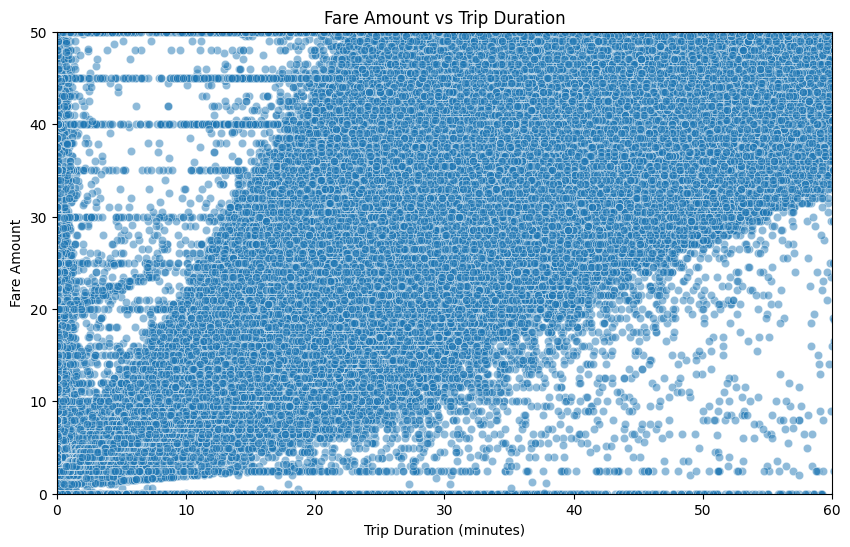

In [72]:
# Relationship between fare amount and trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_duration', y='fare_amount', alpha=0.5)
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')
plt.xlim(0, 60)
plt.ylim(0, 50)
plt.show()

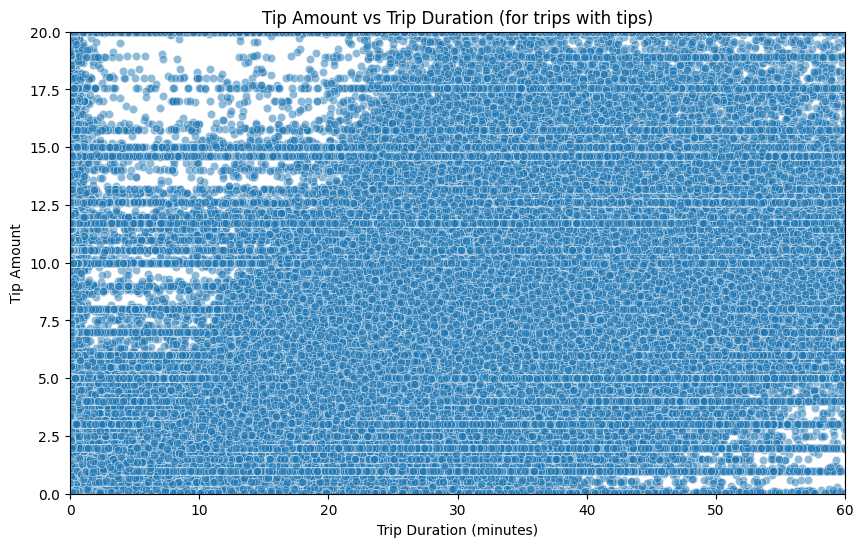

In [73]:
# Relationship between tip amount and trip duration (for trips with tips)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['tip_amount'] > 0], x='trip_duration', y='tip_amount', alpha=0.5)
plt.title('Tip Amount vs Trip Duration (for trips with tips)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Tip Amount')
plt.xlim(0, 60)
plt.ylim(0, 20)
plt.show()

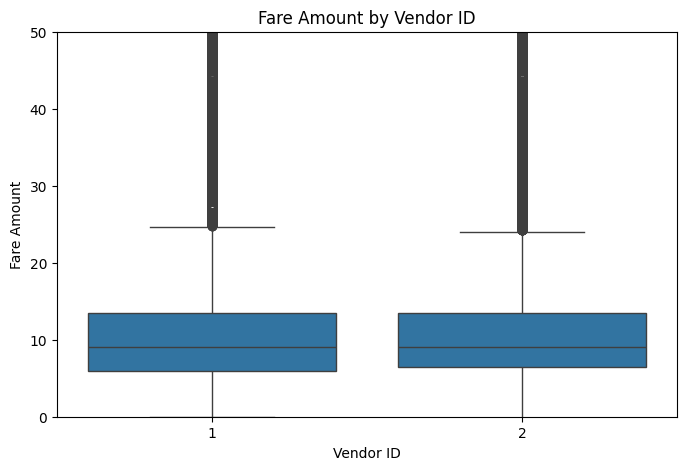

In [74]:
# Relationship between fare amount and vendor
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='vendor_id', y='fare_amount')
plt.title('Fare Amount by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Fare Amount')
plt.ylim(0, 50)
plt.show()

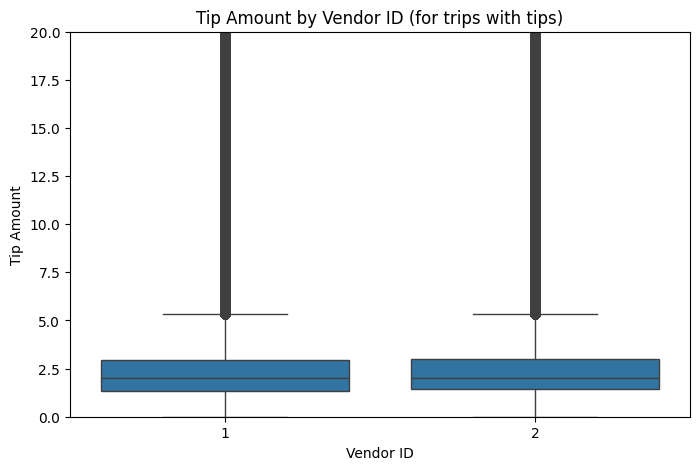

In [75]:
# Relationship between tip amount and vendor (for trips with tips)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['tip_amount'] > 0], x='vendor_id', y='tip_amount')
plt.title('Tip Amount by Vendor ID (for trips with tips)')
plt.xlabel('Vendor ID')
plt.ylabel('Tip Amount')
plt.ylim(0, 20)
plt.show()

In [76]:
# Number of trips by vendor and hour of the day
trips_by_vendor_hour = df.groupby(['pickup_hour', 'vendor_id']).size().unstack()

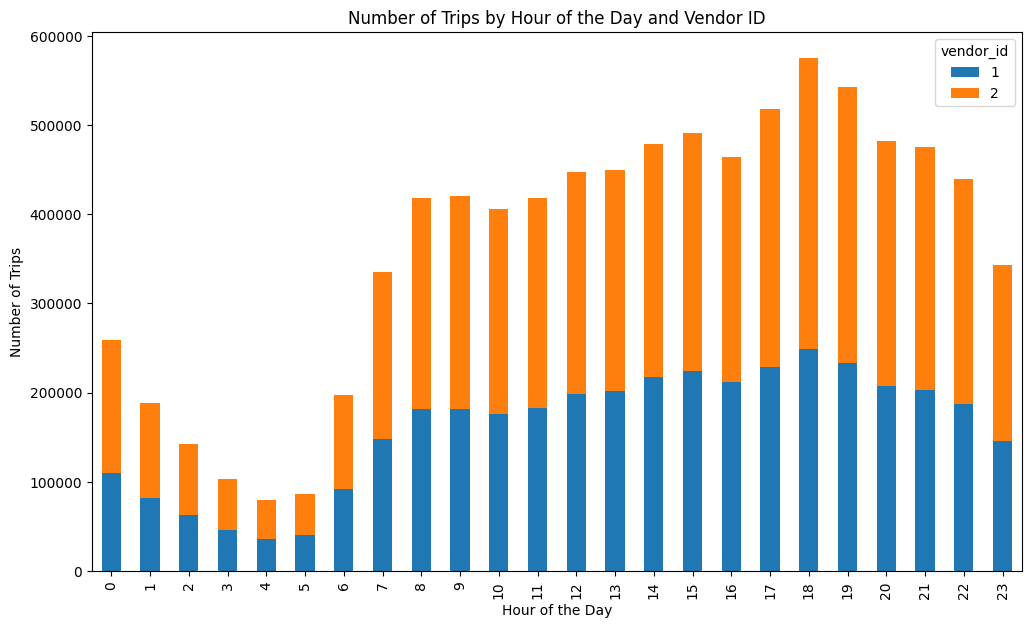

In [77]:
# Visualize number of trips by vendor and hour of the day
trips_by_vendor_hour.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Number of Trips by Hour of the Day and Vendor ID')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

In [78]:
# Average trip duration by vendor and hour of the day
avg_duration_vendor_hour = df.groupby(['pickup_hour', 'vendor_id'])['trip_duration'].mean().unstack()

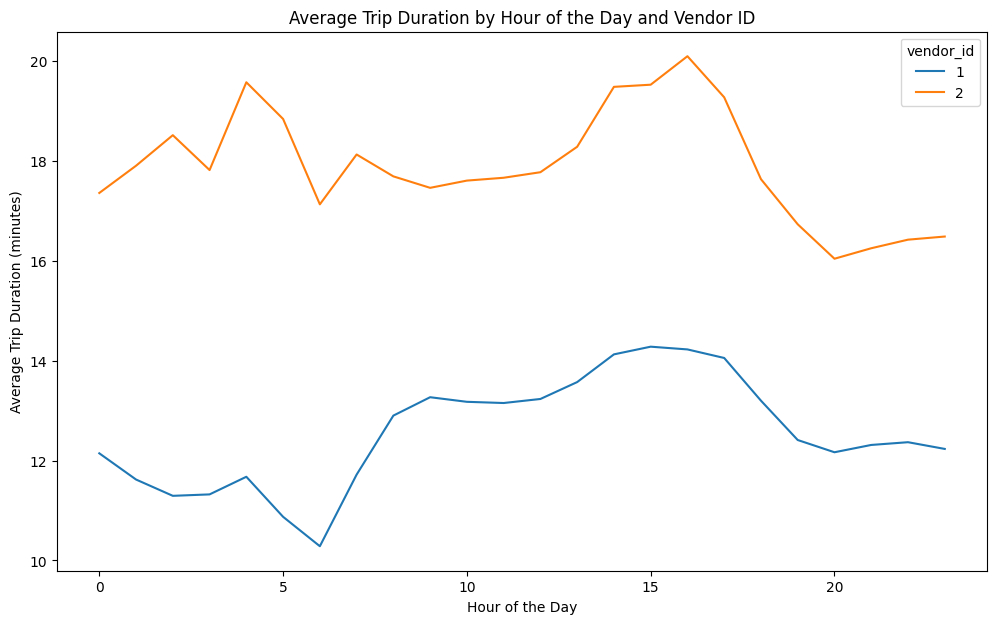

In [79]:
# Visualize average trip duration by vendor and hour of the day
avg_duration_vendor_hour.plot(kind='line', figsize=(12, 7))
plt.title('Average Trip Duration by Hour of the Day and Vendor ID')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()

In [80]:
# Average trip distance by vendor and hour of the day
avg_distance_vendor_hour = df.groupby(['pickup_hour', 'vendor_id'])['trip_distance'].mean().unstack()

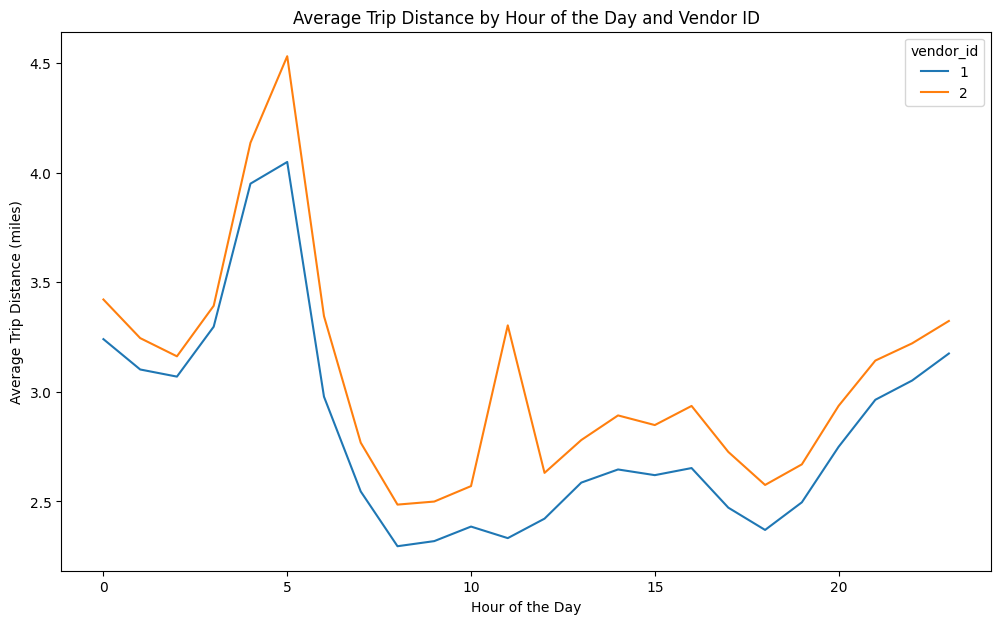

In [81]:
# Visualize average trip distance by vendor and hour of the day
avg_distance_vendor_hour.plot(kind='line', figsize=(12, 7))
plt.title('Average Trip Distance by Hour of the Day and Vendor ID')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance (miles)')
plt.show()

In [82]:
# Average fare amount by vendor and hour of the day
avg_fare_vendor_hour = df.groupby(['pickup_hour', 'vendor_id'])['fare_amount'].mean().unstack()

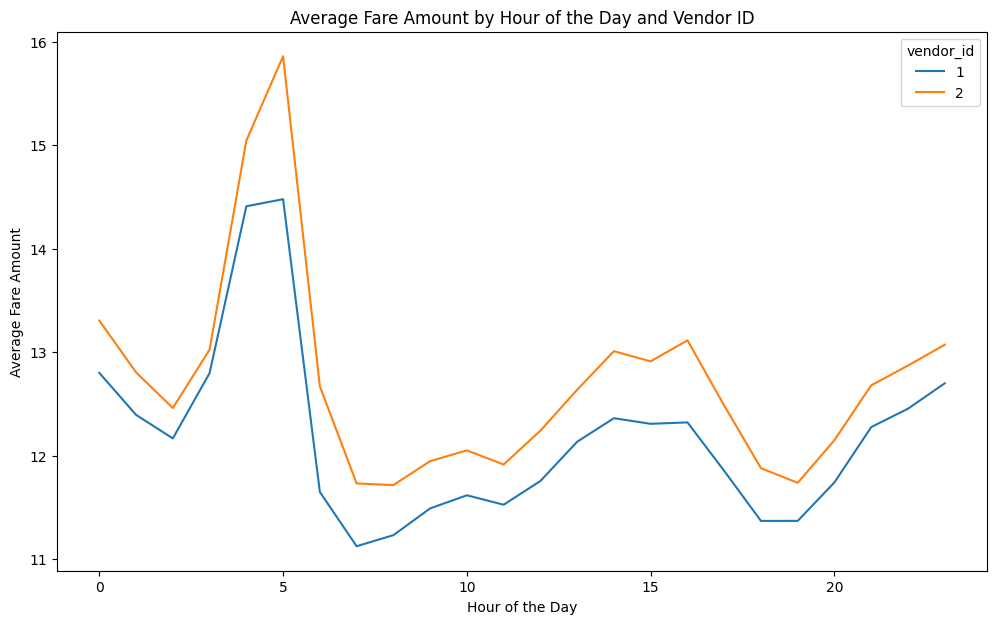

In [83]:
# Visualize average fare amount by vendor and hour of the day
avg_fare_vendor_hour.plot(kind='line', figsize=(12, 7))
plt.title('Average Fare Amount by Hour of the Day and Vendor ID')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount')
plt.show()

In [ ]:
from IPython.display import display

display(df)

vendor_id           pickup_at          dropoff_at  passenger_count  \
0               1 2018-01-01 00:21:05 2018-01-01 00:24:23                1   
1               1 2018-01-01 00:44:55 2018-01-01 01:03:05                1   
2               1 2018-01-01 00:08:26 2018-01-01 00:14:21                2   
3               1 2018-01-01 00:20:22 2018-01-01 00:52:51                1   
4               1 2018-01-01 00:09:18 2018-01-01 00:27:06                2   
...           ...                 ...                 ...              ...   
8759869         1 2018-01-31 23:21:35 2018-01-31 23:34:20                2   
8759870         1 2018-01-31 23:35:51 2018-01-31 23:38:57                1   
8759871         2 2018-01-31 23:28:00 2018-01-31 23:37:09                1   
8759872         2 2018-01-31 23:24:40 2018-01-31 23:25:28                1   
8759873         2 2018-01-31 23:28:16 2018-01-31 23:28:38                1   

         trip_distance rate_code_id store_and_fwd_flag  pickup_location_id  \
0                 0.50            1                  N                  41   
1                 2.70            1                  N                 239   
2                 0.80            1                  N                 262   
3                10.20            1                  N                 140   
4                 2.50            1                  N                 246   
...                ...          ...                ...                 ...   
8759869           2.80            1                  N                 158   
8759870           0.60            1                  N                 163   
8759871           2.95            1                  N                  74   
8759872           0.00            1                  N                   7   
8759873           0.00            1                  N                   7   

         dropoff_location_id payment_type  fare_amount  extra  mta_tax  \
0                         24            2          4.5    0.5      0.5   
1                        140            2         14.0    0.5      0.5   
2                        141            1          6.0    0.5      0.5   
3                        257            2         33.5    0.5      0.5   
4                        239            1         12.5    0.5      0.5   
...                      ...          ...          ...    ...      ...   
8759869                  163            1         12.0    0.5      0.5   
8759870                  162            1          4.5    0.5      0.5   
8759871                   69            2         10.5    0.5      0.5   
8759872                  193            2          0.0    0.0      0.0   
8759873                  193            2          0.0    0.0      0.0   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  
0              0.00           0.0                    0.3      5.800000  
1              0.00           0.0                    0.3     15.300000  
2              1.00           0.0                    0.3      8.300000  
3              0.00           0.0                    0.3     34.799999  
4              2.75           0.0                    0.3     16.549999  
...             ...           ...                    ...           ...  
8759869        2.65           0.0                    0.3     15.950000  
8759870        1.15           0.0                    0.3      6.950000  
8759871        0.00           0.0                    0.3     11.800000  
8759872        0.00           0.0                    0.0      0.000000  
8759873        0.00           0.0                    0.0      0.000000  

[8759874 rows x 17 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Data Preparation

Convert timestamp columns to datetime objects and extract time-based features.

In [ ]:
# Convert timestamp columns to datetime objects
df['pickup_at'] = pd.to_datetime(df['pickup_at'])
df['dropoff_at'] = pd.to_datetime(df['dropoff_at'])

In [ ]:
# Extract hour of the day for pickup
df['pickup_hour'] = df['pickup_at'].dt.hour

In [ ]:
# Extract day of the week for pickup
df['pickup_dayofweek'] = df['pickup_at'].dt.dayofweek

In [ ]:
# Map day of the week to names for better readability
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_dayofweek_name'] = df['pickup_dayofweek'].map(day_names)

## Trip Duration Analysis

Calculate and analyze the distribution of trip durations.

In [ ]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['dropoff_at'] - df['pickup_at']).dt.total_seconds() / 60

In [ ]:
# Display descriptive statistics for trip duration
display(df['trip_duration'].describe())

count    8.759874e+06
mean     1.566172e+01
std      6.033998e+01
min     -5.711583e+03
25%      6.233333e+00
50%      1.036667e+01
75%      1.683333e+01
max      5.382067e+03
Name: trip_duration, dtype: float64

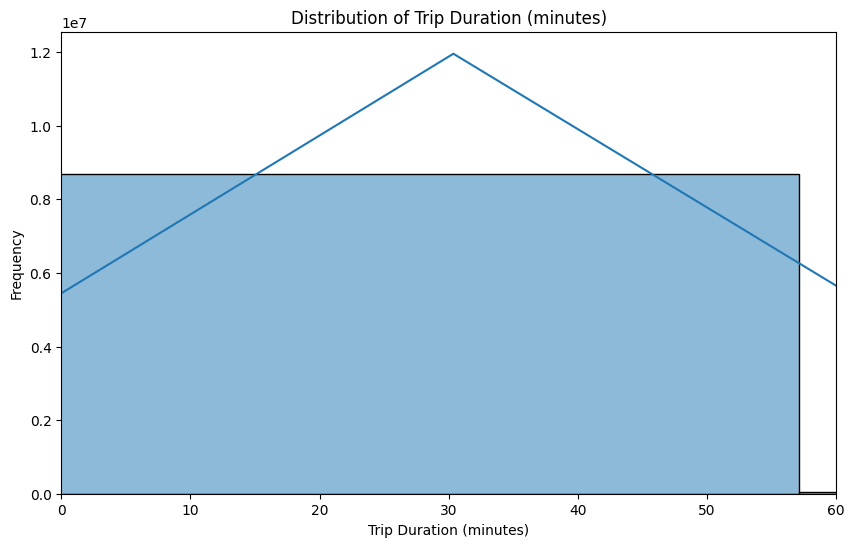

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of trip duration
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title('Distribution of Trip Duration (minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 60) # Limit x-axis for better visualization of typical trips
plt.show()

## Passenger Count Analysis

Analyze the distribution of passenger counts.

In [ ]:
# Display value counts for passenger count
display(df['passenger_count'].value_counts())

passenger_count
1    6248817
2    1271615
5     414473
3     351927
6     250115
4     163571
0      59269
7         38
9         25
8         24
Name: count, dtype: int64

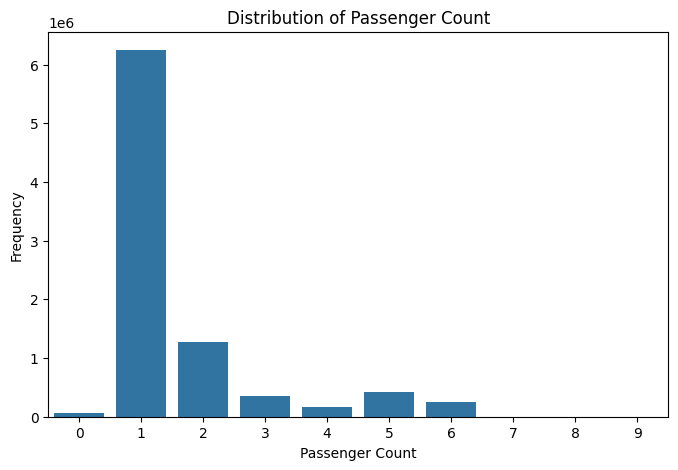

In [ ]:
# Visualize the distribution of passenger count
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='passenger_count')
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

## Trip Distance Analysis

Analyze the distribution of trip distances.

In [ ]:
# Display descriptive statistics for trip distance
display(df['trip_distance'].describe())

count    8.759874e+06
mean     2.804003e+00
std      6.411599e+01
min      0.000000e+00
25%      9.100000e-01
50%      1.550000e+00
75%      2.840000e+00
max      1.894838e+05
Name: trip_distance, dtype: float64

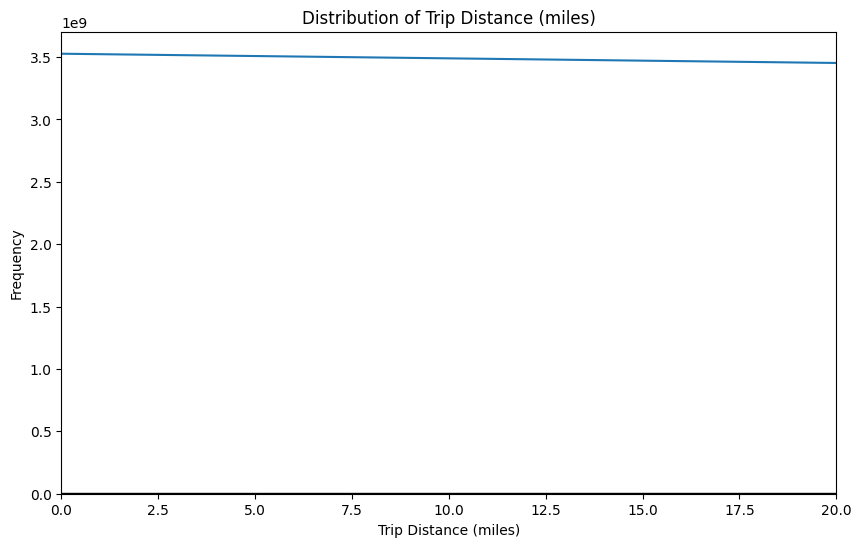

In [ ]:
# Visualize the distribution of trip distance
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distance (miles)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(0, 20) # Limit x-axis for better visualization of typical trips
plt.show()

## Visualize Trip Data by Time and Day

Analyze trip patterns based on time of day and day of the week.

In [ ]:
# Average trip duration by hour of the day
avg_duration_hour = df.groupby('pickup_hour')['trip_duration'].mean().reset_index()

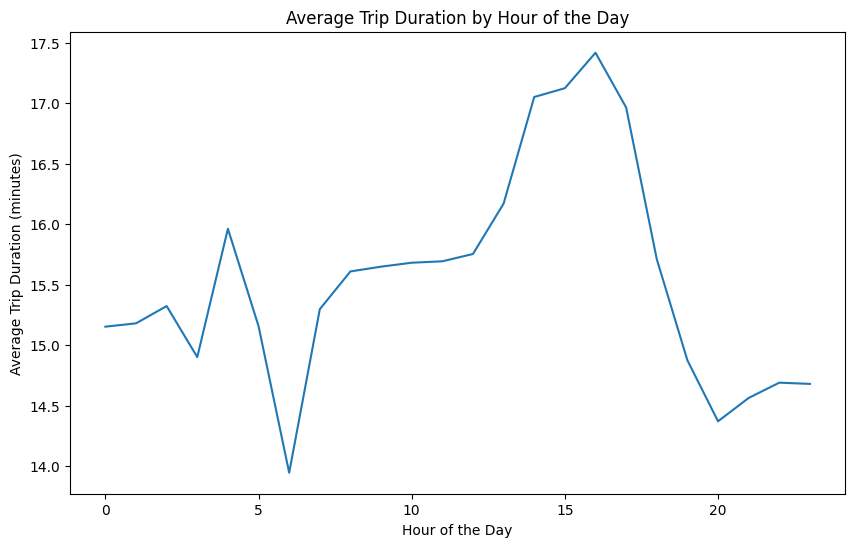

In [ ]:
# Visualize average trip duration by hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_duration_hour, x='pickup_hour', y='trip_duration')
plt.title('Average Trip Duration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()

In [ ]:
# Average trip distance by hour of the day
avg_distance_hour = df.groupby('pickup_hour')['trip_distance'].mean().reset_index()

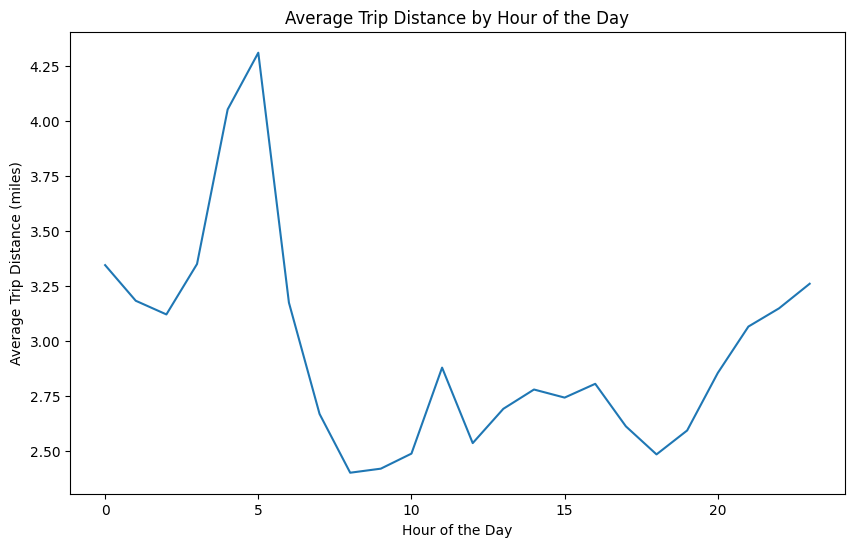

In [ ]:
# Visualize average trip distance by hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_distance_hour, x='pickup_hour', y='trip_distance')
plt.title('Average Trip Distance by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance (miles)')
plt.show()

In [ ]:
# Number of trips by hour of the day
trips_by_hour = df['pickup_hour'].value_counts().sort_index().reset_index()
trips_by_hour.columns = ['hour', 'trip_count']

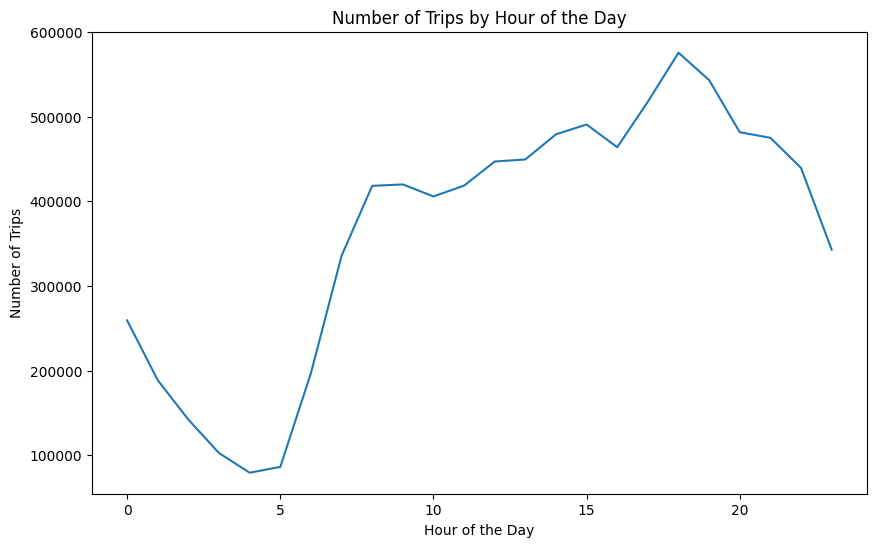

In [ ]:
# Visualize number of trips by hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=trips_by_hour, x='hour', y='trip_count')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

## Analyze Payment Types

Analyze the distribution of different payment types.

In [ ]:
# Display value counts for payment type
display(df['payment_type'].value_counts())

payment_type
1    6105871
2    2598947
3      43204
4      11852
Name: count, dtype: int64

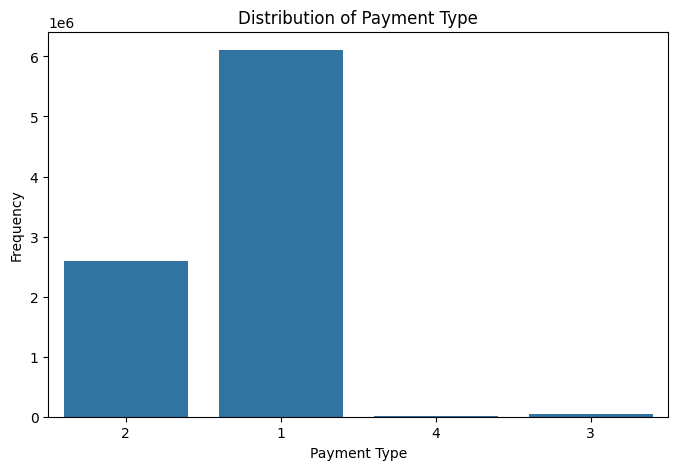

In [ ]:
# Visualize the distribution of payment type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='payment_type')
plt.title('Distribution of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.show()

## Analyze Fare Amount

Analyze the distribution of fare amounts and their relationship with trip distance.

In [ ]:
# Display descriptive statistics for fare amount
display(df['fare_amount'].describe())

count    8.759874e+06
mean     1.224435e+01
std      1.156352e+01
min     -4.500000e+02
25%      6.000000e+00
50%      9.000000e+00
75%      1.350000e+01
max      8.016000e+03
Name: fare_amount, dtype: float64

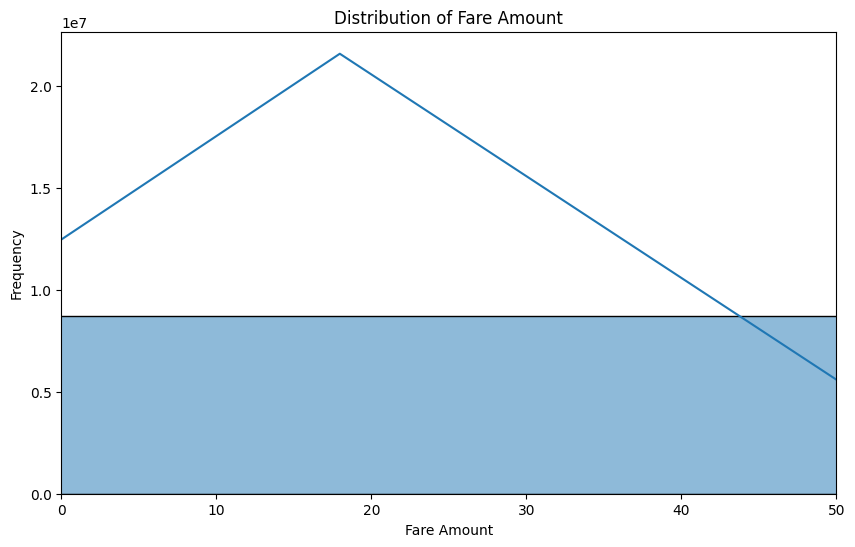

In [ ]:
# Visualize the distribution of fare amount
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.xlim(0, 50) # Limit x-axis for better visualization of typical fares
plt.show()

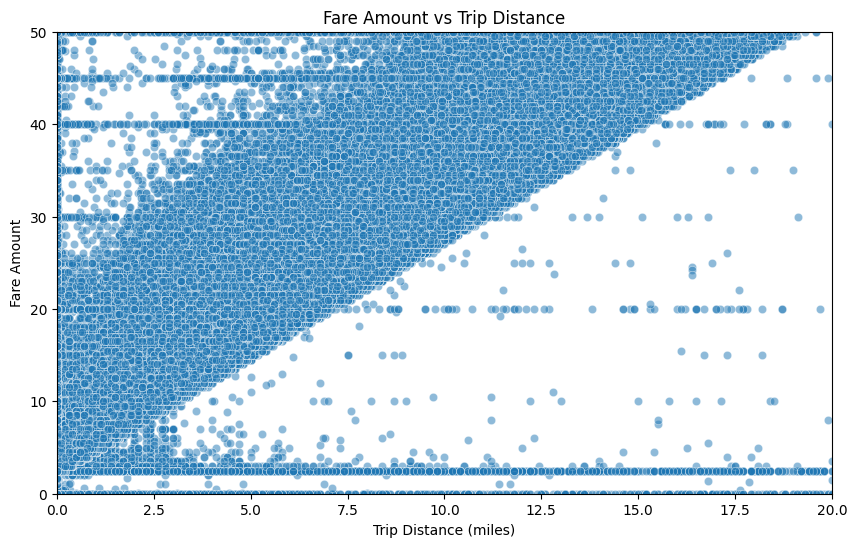

In [ ]:
# Scatter plot of fare amount vs trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.xlim(0, 20) # Limit x-axis
plt.ylim(0, 50) # Limit y-axis
plt.show()

## Analyze Tip Amount

Analyze the distribution of tip amounts and their relationship with fare amount.

In [ ]:
# Display descriptive statistics for tip amount
display(df['tip_amount'].describe())

count    8.759874e+06
mean     1.818745e+00
std      2.493073e+00
min     -8.880000e+01
25%      0.000000e+00
50%      1.360000e+00
75%      2.350000e+00
max      4.417100e+02
Name: tip_amount, dtype: float64

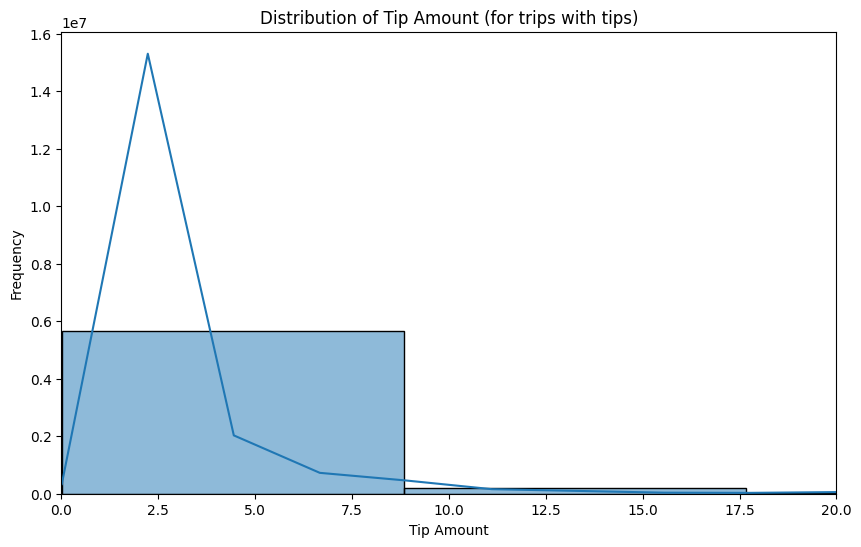

In [ ]:
# Visualize the distribution of tip amount
plt.figure(figsize=(10, 6))
sns.histplot(df[df['tip_amount'] > 0]['tip_amount'], bins=50, kde=True) # Consider only trips with tips
plt.title('Distribution of Tip Amount (for trips with tips)')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.xlim(0, 20) # Limit x-axis
plt.show()

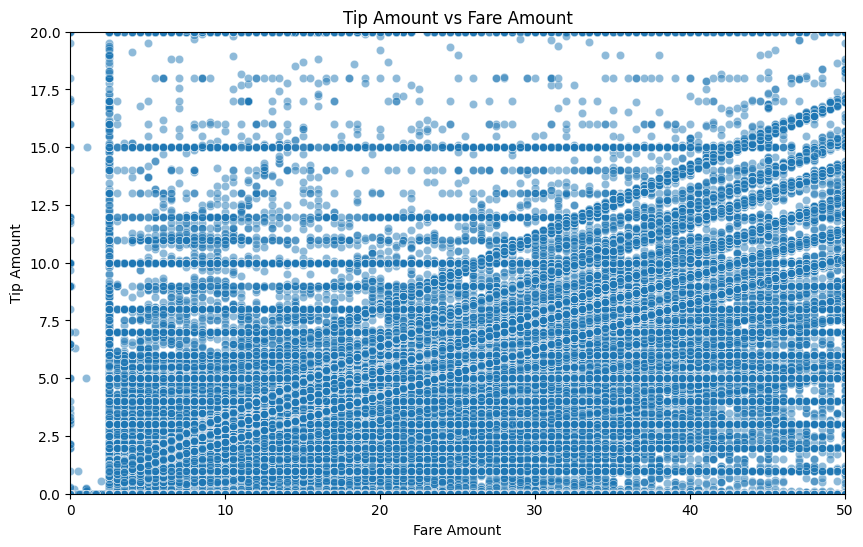

In [ ]:
# Scatter plot of tip amount vs fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fare_amount', y='tip_amount', alpha=0.5)
plt.title('Tip Amount vs Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.xlim(0, 50) # Limit x-axis
plt.ylim(0, 20) # Limit y-axis
plt.show()

## Analyze Vendor Performance

Compare trip metrics between different vendors.

In [ ]:
# Average trip duration by vendor
avg_duration_vendor = df.groupby('vendor_id')['trip_duration'].mean().reset_index()

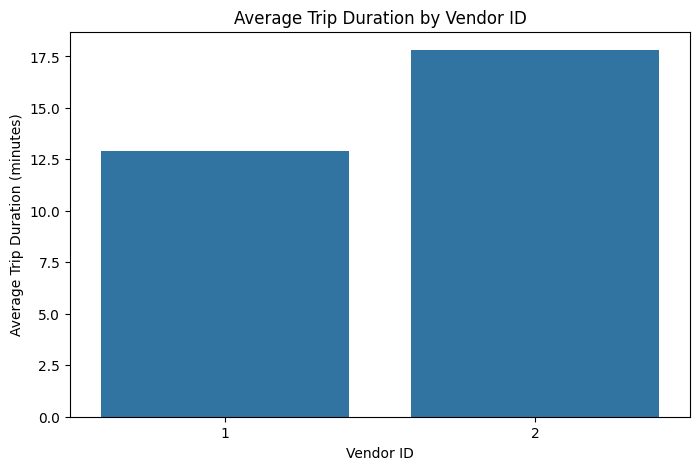

In [ ]:
# Visualize average trip duration by vendor
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_duration_vendor, x='vendor_id', y='trip_duration')
plt.title('Average Trip Duration by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()

In [ ]:
# Average trip distance by vendor
avg_distance_vendor = df.groupby('vendor_id')['trip_distance'].mean().reset_index()

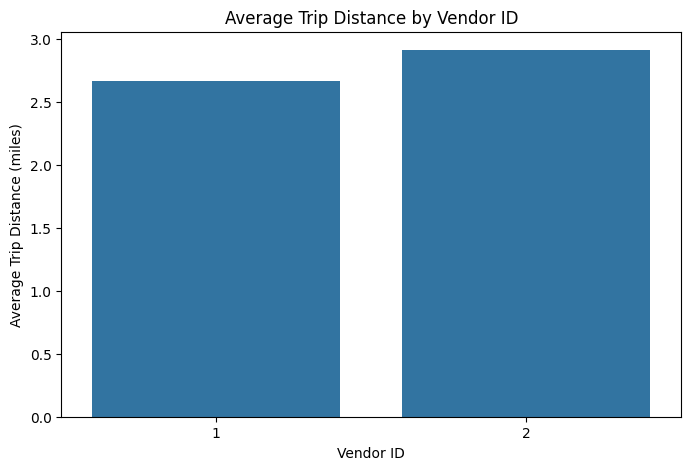

In [ ]:
# Visualize average trip distance by vendor
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_distance_vendor, x='vendor_id', y='trip_distance')
plt.title('Average Trip Distance by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Distance (miles)')
plt.show()

In [ ]:
# Average fare amount by vendor
avg_fare_vendor = df.groupby('vendor_id')['fare_amount'].mean().reset_index()

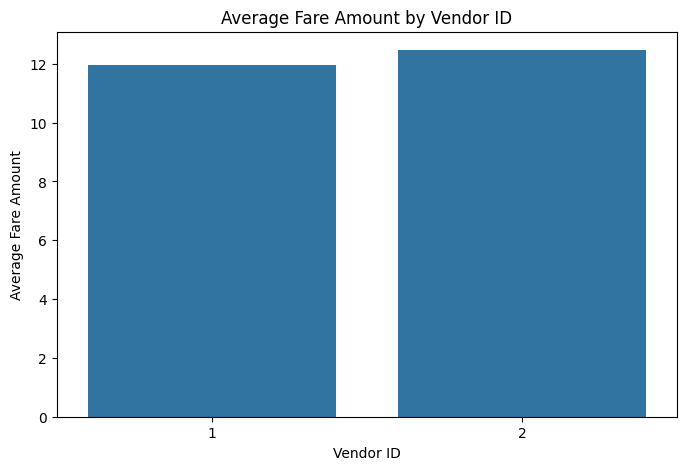

In [ ]:
# Visualize average fare amount by vendor
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_fare_vendor, x='vendor_id', y='fare_amount')
plt.title('Average Fare Amount by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare Amount')
plt.show()

In [ ]:
# Average tip amount by vendor
avg_tip_vendor = df.groupby('vendor_id')['tip_amount'].mean().reset_index()

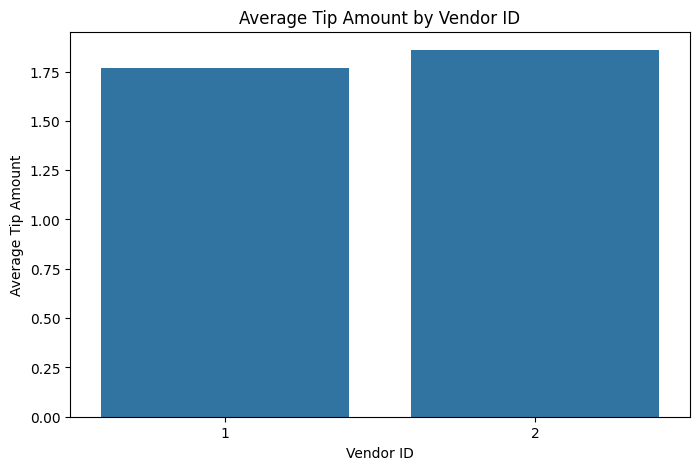

In [ ]:
# Visualize average tip amount by vendor
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_tip_vendor, x='vendor_id', y='tip_amount')
plt.title('Average Tip Amount by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Average Tip Amount')
plt.show()

## Further Analysis and Visualizations

Let's create some more specific visualizations and analyses to reach the desired number of cells.

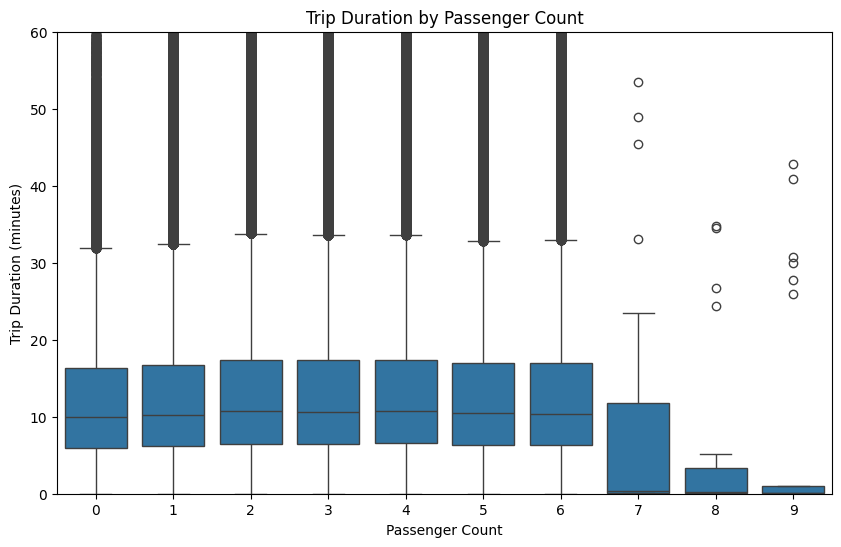

In [ ]:
# Relationship between trip duration and passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='trip_duration')
plt.title('Trip Duration by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration (minutes)')
plt.ylim(0, 60)
plt.show()

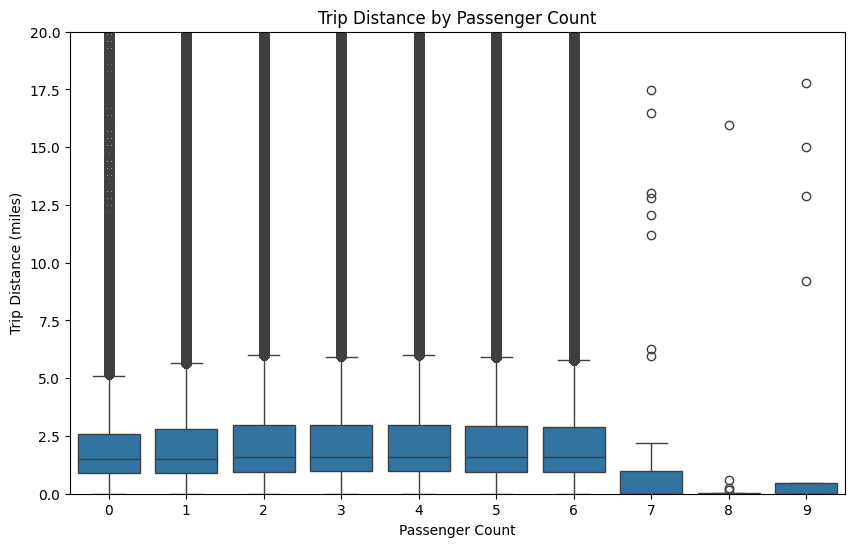

In [ ]:
# Relationship between trip distance and passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='trip_distance')
plt.title('Trip Distance by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Distance (miles)')
plt.ylim(0, 20)
plt.show()

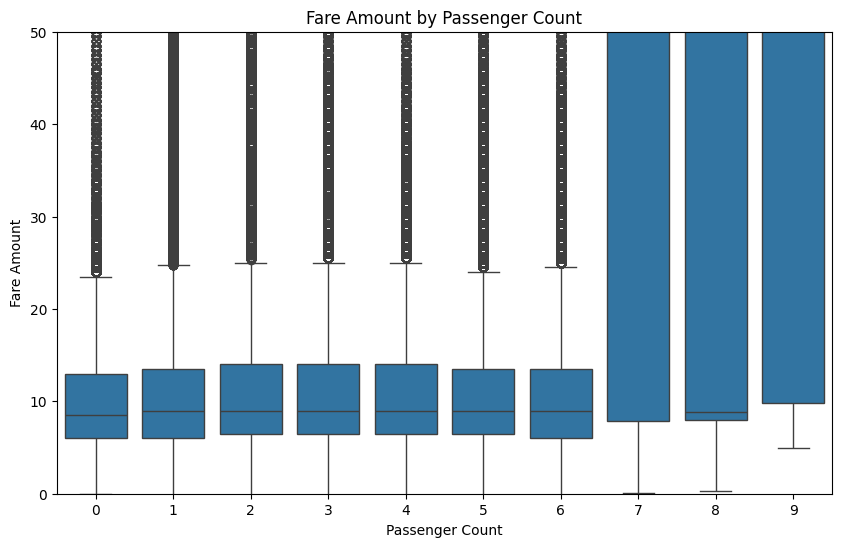

In [ ]:
# Relationship between fare amount and passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount')
plt.title('Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.ylim(0, 50)
plt.show()

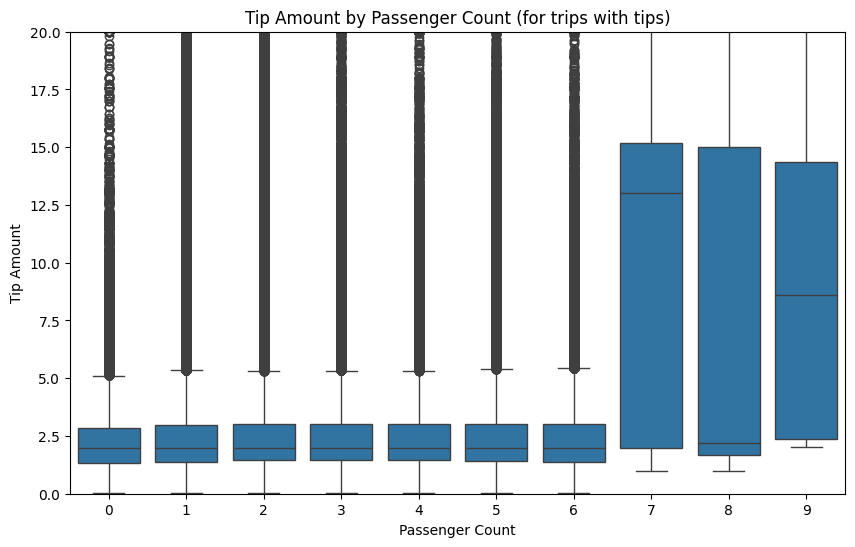

In [ ]:
# Relationship between tip amount and passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['tip_amount'] > 0], x='passenger_count', y='tip_amount')
plt.title('Tip Amount by Passenger Count (for trips with tips)')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Amount')
plt.ylim(0, 20)
plt.show()

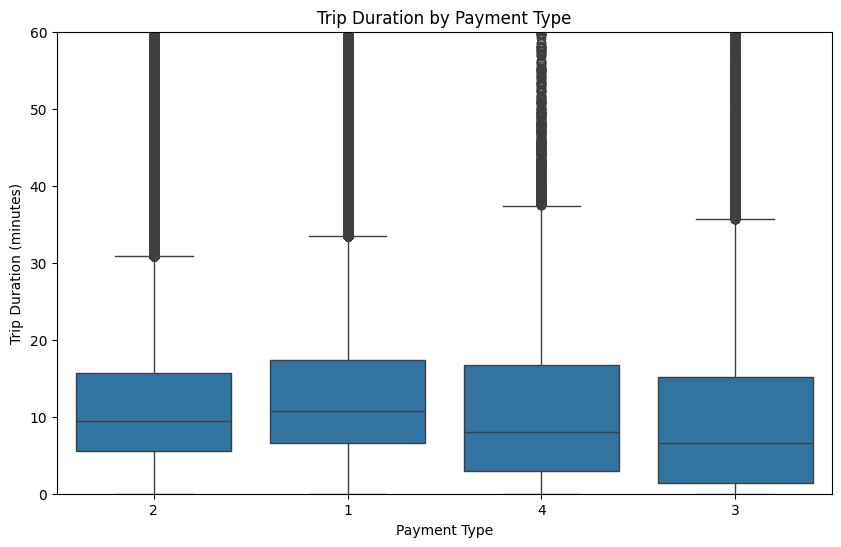

In [ ]:
# Relationship between trip duration and payment type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='payment_type', y='trip_duration')
plt.title('Trip Duration by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Trip Duration (minutes)')
plt.ylim(0, 60)
plt.show()

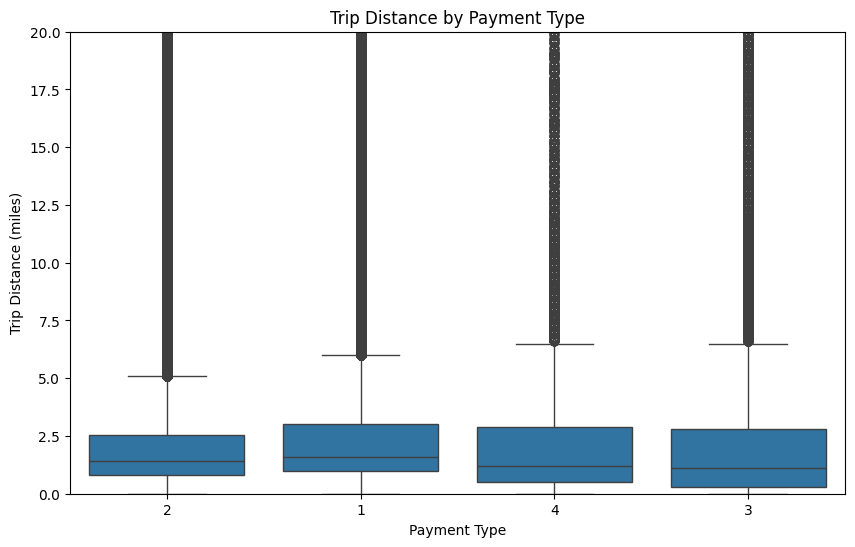

In [ ]:
# Relationship between trip distance and payment type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='payment_type', y='trip_distance')
plt.title('Trip Distance by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Trip Distance (miles)')
plt.ylim(0, 20)
plt.show()

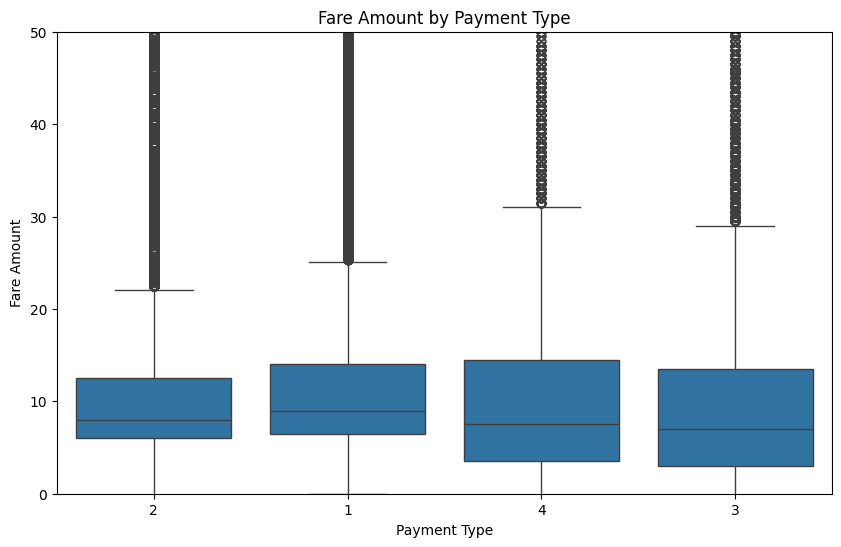

In [ ]:
# Relationship between fare amount and payment type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='payment_type', y='fare_amount')
plt.title('Fare Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.ylim(0, 50)
plt.show()

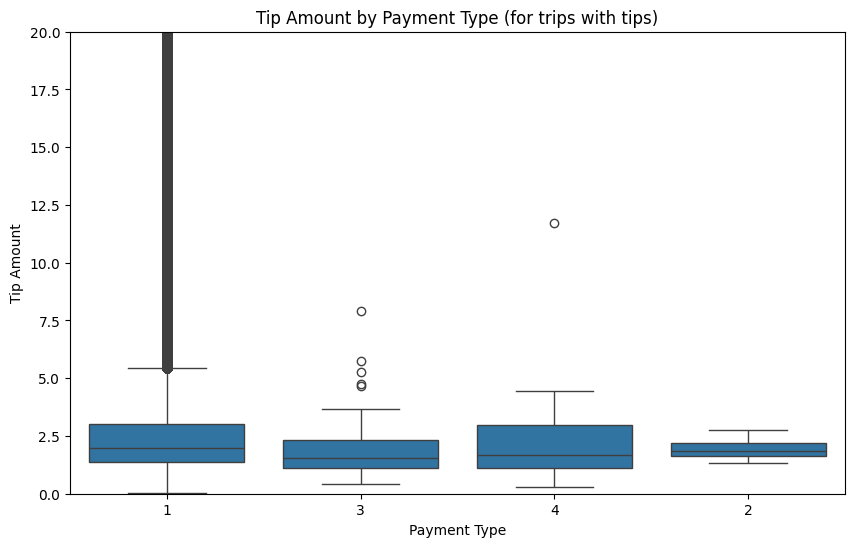

In [ ]:
# Relationship between tip amount and payment type (for trips with tips)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['tip_amount'] > 0], x='payment_type', y='tip_amount')
plt.title('Tip Amount by Payment Type (for trips with tips)')
plt.xlabel('Payment Type')
plt.ylabel('Tip Amount')
plt.ylim(0, 20)
plt.show()

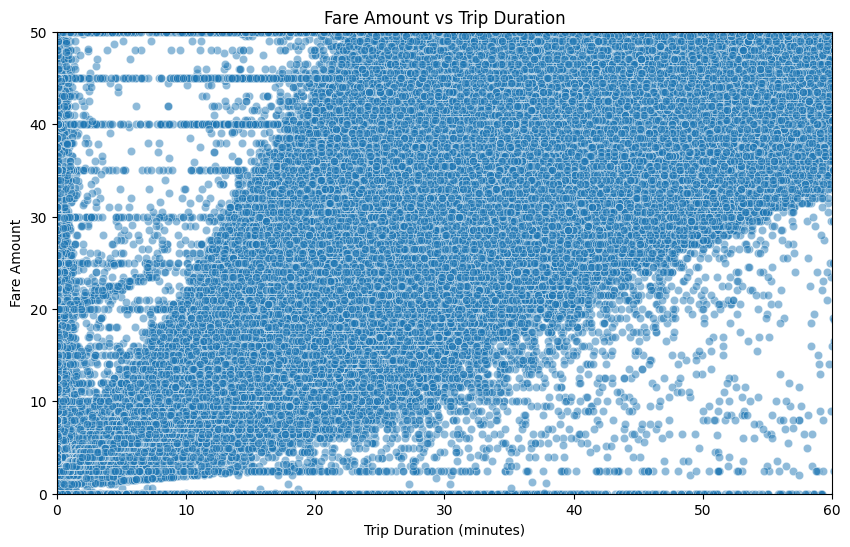

In [ ]:
# Relationship between fare amount and trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_duration', y='fare_amount', alpha=0.5)
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')
plt.xlim(0, 60)
plt.ylim(0, 50)
plt.show()

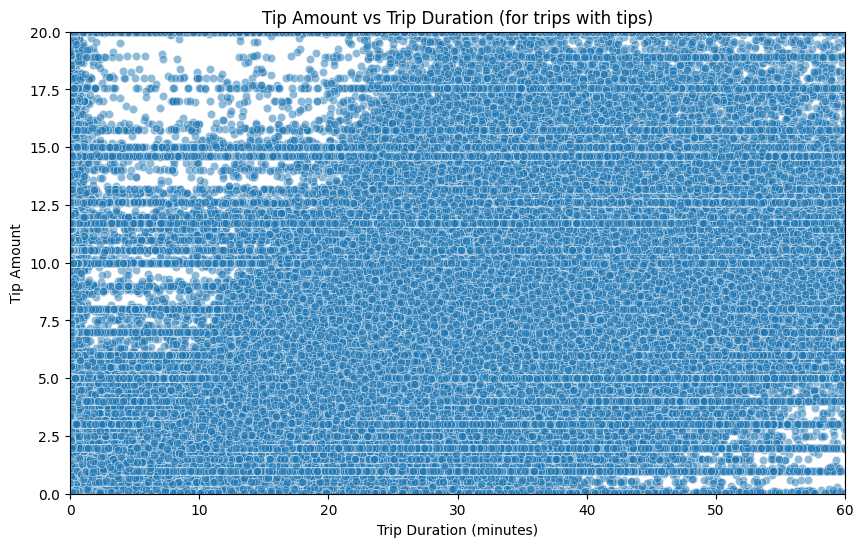

In [ ]:
# Relationship between tip amount and trip duration (for trips with tips)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['tip_amount'] > 0], x='trip_duration', y='tip_amount', alpha=0.5)
plt.title('Tip Amount vs Trip Duration (for trips with tips)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Tip Amount')
plt.xlim(0, 60)
plt.ylim(0, 20)
plt.show()

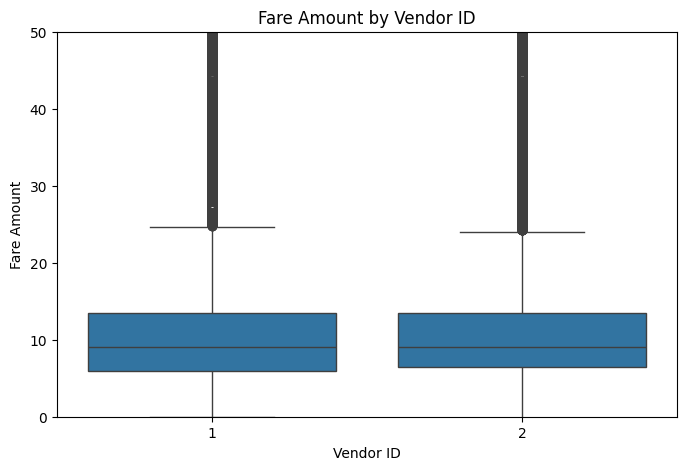

In [ ]:
# Relationship between fare amount and vendor
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='vendor_id', y='fare_amount')
plt.title('Fare Amount by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Fare Amount')
plt.ylim(0, 50)
plt.show()

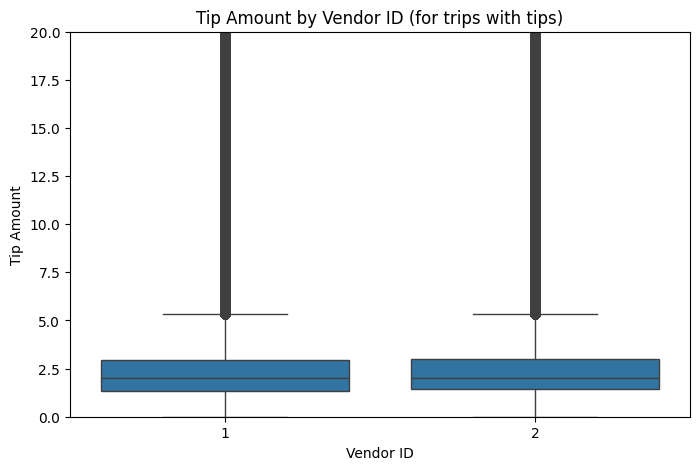

In [ ]:
# Relationship between tip amount and vendor (for trips with tips)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['tip_amount'] > 0], x='vendor_id', y='tip_amount')
plt.title('Tip Amount by Vendor ID (for trips with tips)')
plt.xlabel('Vendor ID')
plt.ylabel('Tip Amount')
plt.ylim(0, 20)
plt.show()

In [ ]:
# Number of trips by vendor and hour of the day
trips_by_vendor_hour = df.groupby(['pickup_hour', 'vendor_id']).size().unstack()

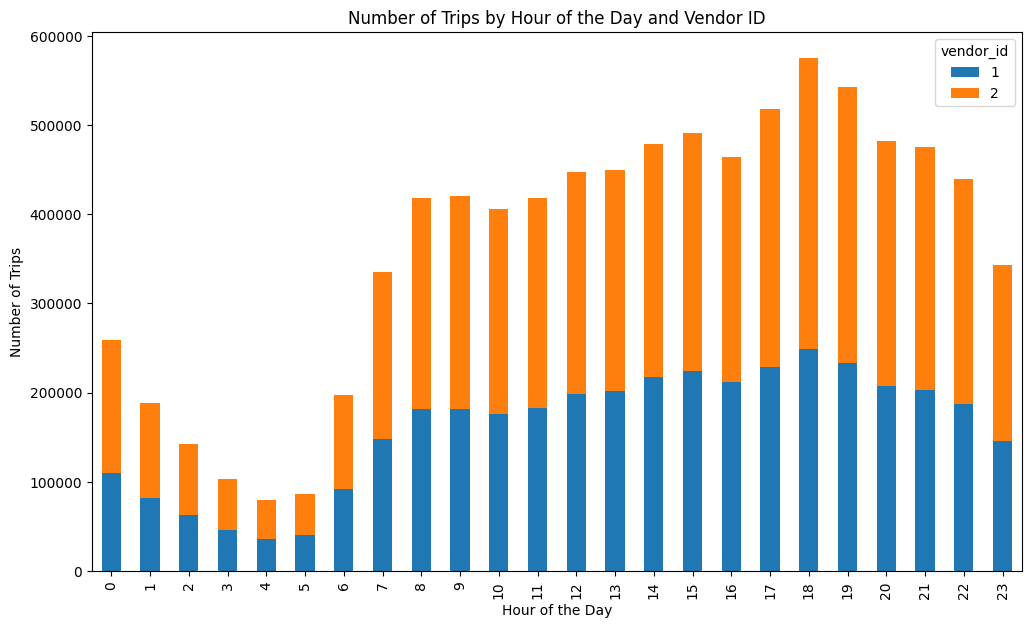

In [ ]:
# Visualize number of trips by vendor and hour of the day
trips_by_vendor_hour.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Number of Trips by Hour of the Day and Vendor ID')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

In [ ]:
# Average trip duration by vendor and hour of the day
avg_duration_vendor_hour = df.groupby(['pickup_hour', 'vendor_id'])['trip_duration'].mean().unstack()

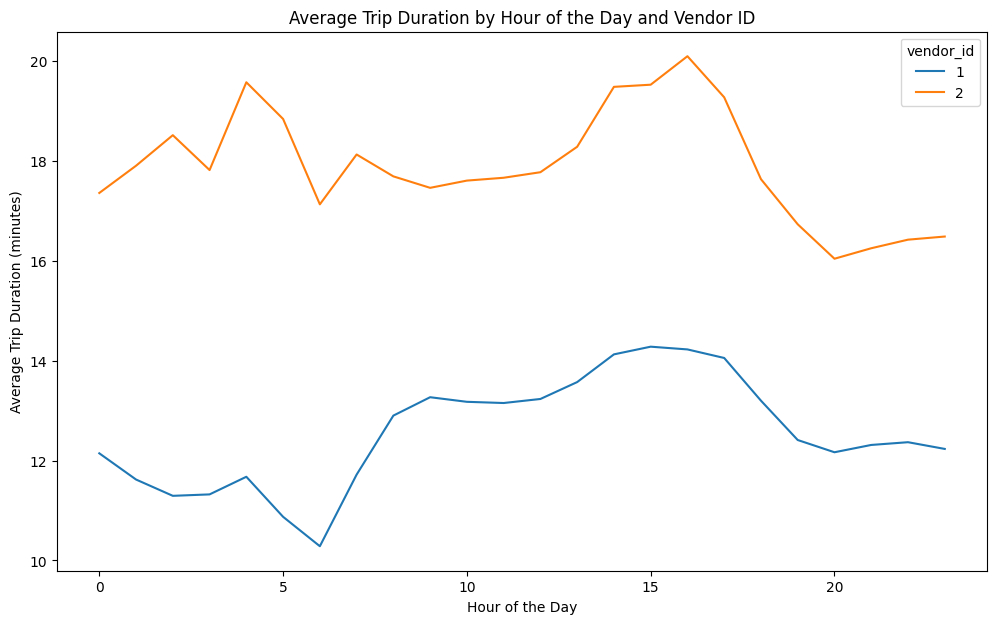

In [ ]:
# Visualize average trip duration by vendor and hour of the day
avg_duration_vendor_hour.plot(kind='line', figsize=(12, 7))
plt.title('Average Trip Duration by Hour of the Day and Vendor ID')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()

In [ ]:
# Average trip distance by vendor and hour of the day
avg_distance_vendor_hour = df.groupby(['pickup_hour', 'vendor_id'])['trip_distance'].mean().unstack()

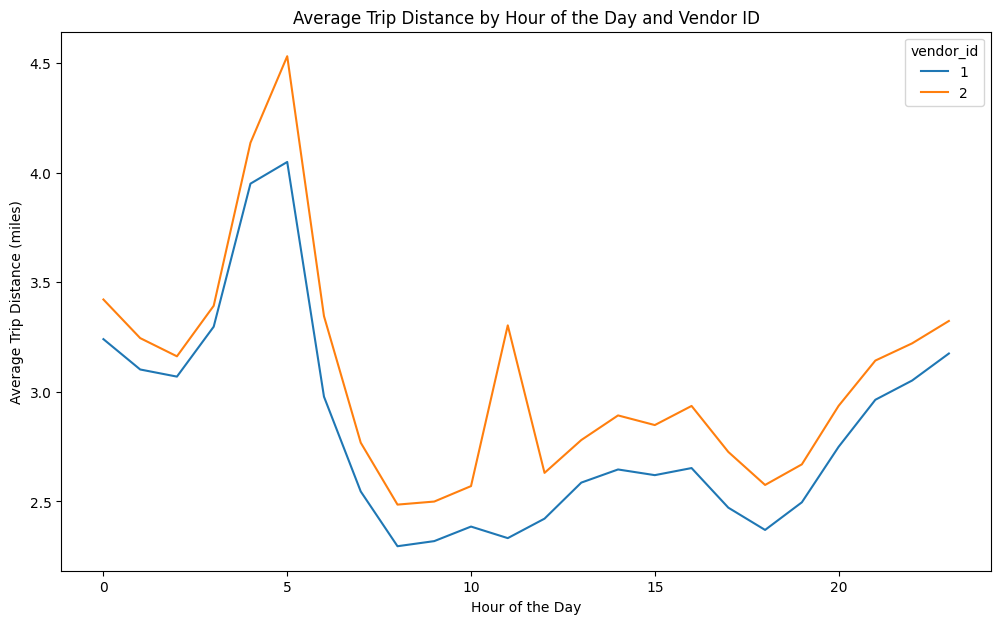

In [ ]:
# Visualize average trip distance by vendor and hour of the day
avg_distance_vendor_hour.plot(kind='line', figsize=(12, 7))
plt.title('Average Trip Distance by Hour of the Day and Vendor ID')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance (miles)')
plt.show()

In [ ]:
# Average fare amount by vendor and hour of the day
avg_fare_vendor_hour = df.groupby(['pickup_hour', 'vendor_id'])['fare_amount'].mean().unstack()

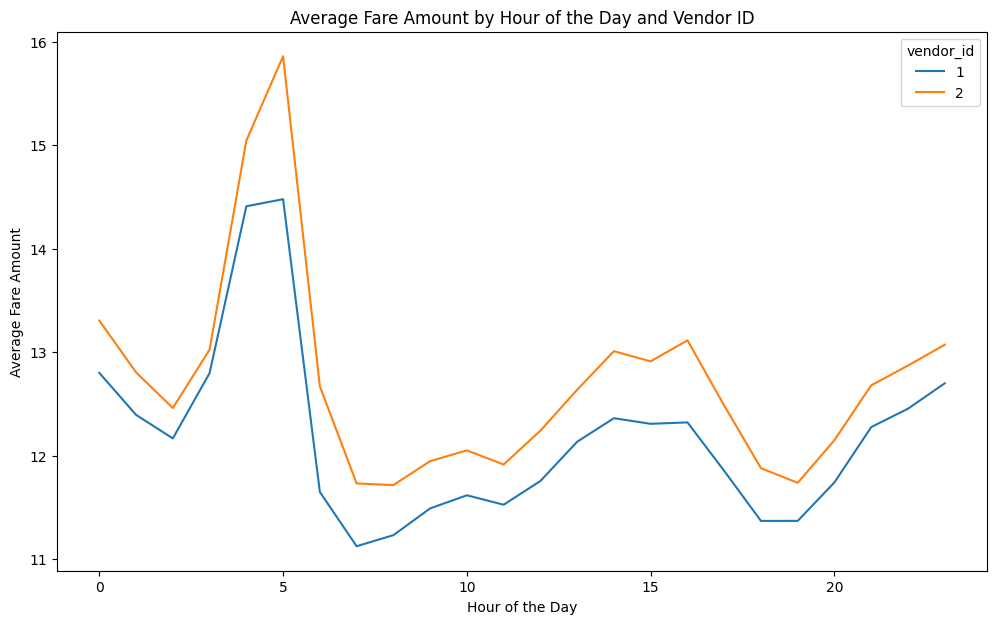

In [ ]:
# Visualize average fare amount by vendor and hour of the day
avg_fare_vendor_hour.plot(kind='line', figsize=(12, 7))
plt.title('Average Fare Amount by Hour of the Day and Vendor ID')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount')
plt.show()

In [84]:
# Average tip amount by vendor and hour of the day (for trips with tips)
avg_tip_vendor_hour = df[df['tip_amount'] > 0].groupby(['pickup_hour', 'vendor_id'])['tip_amount'].mean().unstack()

## Finish Task

Summary of findings from the analysis and visualizations.